<center>

### COSC2753 - Machine Learning

# **Exploratory Data Analysis (EDA)**

<center>────────────────────────────</center>
&nbsp;

# Table of Contents

</center>

## [I. Introduction](#i-introduction)

## [II. Libraries Import and Data Preprocessing](#ii-libraries-import-and-data-preprocessing)

- ### [2.1 Importing Libraries](#21-importing-libraries)

- ### [2.2 Global Configuration](#22-global-configuration)

- ### [2.3 Data Loading](#23-data-loading)

- ### [2.4 Data Preprocessing](#24-data-preprocessing)

    - ### [2.4.1 Data Types](#241-data-types)

    - ### [2.4.2 Data Overview](#242-data-overview)

    - ### [2.4.3 Data Validation](#243-data-validation)

## [III. Univariate Analysis](#iii-univariate-analysis)


&nbsp;



<center><em><sub>─────── End Of Section ───────</sub></em></center>


# I. Introduction


This notebook focuses on Exploratory Data Analysis (EDA) as the foundation for our machine learning workflow with the provided datasets. Through EDA, we will gain a comprehensive understanding of the data, including:

- Data cleaning and preprocessing.
- Features/Target variables distribution and relationships analysis.
- Correlation analysis.
- Outliers detection.
- Model selection and evaluation.

Upon finishing, this notebook will provide valuable insights of the data for subsequent stages.

<center><em><sub>─────── End Of Section ───────</sub></em></center>


# II. Project Initilization


## 1. Global Configuration


In [224]:
# Import necessary packages
import pandas as pd  # Data manipulation
import numpy as np  # Linear algebra
import seaborn as sns  # Visualization
import matplotlib  # Plotting
import sklearn  # Machine learning
import tabulate  # Pretty printing
import time  # Time tracking
import sys  # System specific parameters and functions
import importlib  # Importing modules
import statsmodels  # Statistical models
import imblearn  # Imbalanced learning

# Reload modules
sys.path.append("../../")  # Root directory
modules_to_reload = [
    "scripts.outlier_detector",
    "scripts.styler",
    "scripts.neko",
    "scripts.utils",
]

# Reload modules if they have been modified
missing_modules = []

for module_name in modules_to_reload:
    if module_name in sys.modules:
        importlib.reload(sys.modules[module_name])
    else:
        missing_modules.append(module_name)

# Recache missing modules
if missing_modules:
    print(f"Modules {missing_modules} not found. \nRecaching...")

# Import user-defined scripts
from scripts.styler import Styler
from scripts.neko import Neko
from scripts.utils import Utils
from scripts.outlier_detector import OutlierDetector


# Initialize styler
styler = Styler()  # Text Styler

# Check package versions
styler.draw_box("Checking Package Versions...")

try:
    with open("../../requirements.txt", "r") as file:
        requirements = file.readlines()
except FileNotFoundError:
    print(f"File '../../requirements.txt' not found.")

packages_to_check = [np, pd, sns, matplotlib, tabulate, sklearn, statsmodels, imblearn]

for package in packages_to_check:
    Utils.version_check(package, requirements=requirements)

styled_text = styler.style(
    "\nDone checking packages version...\n", bold=True, italic=True
)
print(styled_text)

# Initialize objects
styler.draw_box("Initializing Project...")
neko = Neko()  # Panda extension
bullet = ">>>"  # Bullet point
plt = matplotlib.pyplot  # Matplotlib

# Configuration
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.precision", 3)

styled_text = styler.style("Done initializing project...", bold=True, italic=True)
print(styled_text)

┌────────────────────────────────┐
│  Checking Package Versions...  │
└────────────────────────────────┘
>>> numpy is up to date: 1.26.4
>>> pandas is up to date: 2.2.1
>>> seaborn is up to date: 0.13.2
>>> matplotlib is up to date: 3.8.3
>>> tabulate is up to date: 0.9.0
>>> sklearn is up to date: 1.4.1.post1
>>> statsmodels is up to date: 0.14.1
>>> imblearn is up to date: 0.12.2

Done checking packages version...

┌───────────────────────────┐
│  Initializing Project...  │
└───────────────────────────┘

    /\_____/\
   /  x   o  \
  ( ==  ^  == )       Neko has arrived!
   )         (        An data visualizing extension for analyzing DataFrames.
  (           )       Art: https://www.asciiart.eu/animals/cats.
 ( (  )   (  ) )
(__(__)___(__)__)

Done initializing project...


## 2. Data Loading


In [59]:
try:
    # Load the training dataset
    df_train = pd.read_csv("../../data/raw/data_train.csv")

    styler.draw_box("Dataset Overview")

    # Get data essence
    print(neko.essense(df_train))

except Exception as e:
    # Handle Exception
    text = f" {bullet} Error: {str(e)}"
    print(text)

┌────────────────────┐
│  Dataset Overview  │
└────────────────────┘
╭────┬─────────────────────────────┬───────────╮
│    │ Attribute                   │ Value     │
├────┼─────────────────────────────┼───────────┤
│  0 │ Number of Rows              │ 202944    │
├────┼─────────────────────────────┼───────────┤
│  1 │ Number of Columns           │ 25        │
├────┼─────────────────────────────┼───────────┤
│  2 │ Data Types                  │ ['int64'] │
├────┼─────────────────────────────┼───────────┤
│  3 │ Total Missing Values        │ 0         │
├────┼─────────────────────────────┼───────────┤
│  4 │ Columns with Missing Values │ []        │
├────┼─────────────────────────────┼───────────┤
│  5 │ Number of Duplicates        │ 0         │
├────┼─────────────────────────────┼───────────┤
│  6 │ Memory Usage (MB)           │ 38.7      │
╰────┴─────────────────────────────┴───────────╯


### **Initial Data Exploration**

This initial exploration of the data yielded the following key observations:

- **Data Loading:** The dataset comprises approximately `200,000` rows and `25` columns. Given its size, careful selection of data cleaning and preprocessing techniques will be essential to ensure data quality and integrity for further analysis.

- **Data Type Consistency:** A positive aspect is that all columns possess the same data type (`int64`), potentially simplifying the data cleaning process.

- **Missing Value Assessment:** An initial check for missing values (`null`, `NaN`, or `empty values`) was conducted. This ensures the data is not empty or containing invalid values.

- **Duplicate Detection:** No duplicates were identified within the dataset at this stage (with the presence of the `Id` column).

### **Feature Explanation**

| Variable             | Description                                                                                                                                                                  | Category    |
| -------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------- |
| ID                   | Patient ID                                                                                                                                                                   | Numerical   |
| Status               | 0 = no diabetes, 1 = prediabetes or diabetes                                                                                                                                 | Categorical |
| HighBP               | 0 = no high BP, 1 = high BP                                                                                                                                                  | Categorical |
| HighChol             | 0 = no high cholesterol, 1 = high cholesterol                                                                                                                                | Categorical |
| CholCheck            | 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years                                                                                                    | Categorical |
| BMI                  | Body Mass Index                                                                                                                                                              | Numerical   |
| Smoker               | 0 = no, 1 = yes (smoked at least 100 cigarettes in lifetime)                                                                                                                 | Categorical |
| Stroke               | 0 = no, 1 = yes (history of stroke)                                                                                                                                          | Categorical |
| HeartDiseaseorAttack | 0 = no, 1 = yes (coronary heart disease or myocardial infarction)                                                                                                            | Categorical |
| PhysActivity         | 0 = no, 1 = yes (physical activity in past 30 days, excluding job)                                                                                                           | Categorical |
| Fruits               | 0 = no, 1 = yes (consume fruit ≥ 1 time per day)                                                                                                                             | Categorical |
| Veggies              | 0 = no, 1 = yes (consume vegetables ≥ 1 time per day)                                                                                                                        | Categorical |
| HvyAlcoholConsump    | 0 = no, 1 = yes (heavy alcohol consumption)                                                                                                                                  | Categorical |
| AnyHealthcare        | 0 = no, 1 = yes (health care coverage)                                                                                                                                       | Categorical |
| NoDocbcCost          | 0 = no, 1 = yes (unable to see doctor due to cost)                                                                                                                           | Categorical |
| GenHlth              | Scale 1-5: 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor                                                                                                        | Categorical |
| MentHlth             | Number of days in past 30 days with poor mental health (scale 1-30 days)                                                                                                     | Numerical   |
| PhysHlth             | Number of days in past 30 days with poor physical health (scale 1-30 days)                                                                                                   | Numerical   |
| DiffWalk             | 0 = no, 1 = yes (serious difficulty walking or climbing stairs)                                                                                                              | Categorical |
| Sex                  | 0 = female, 1 = male                                                                                                                                                         | Categorical |
| Age                  | 13-level age category: 1 = 18-24, 9 = 60-64, 13 = 80 or older                                                                                                                | Categorical |
| Education            | Scale 1-6: 1 = Never attended school or only kindergarten, 2 = Grades 1 through 8, 3 = Grades 9 through 11, 4 = Grade 12 or GED, 5 = College 1-3 years, 6 = College 4+ years | Categorical |
| Income               | Scale 1-8: 1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more                                                                                                 | Categorical |
| ExtraMedTest         | Result of an extra medical test (range -100 to 100)                                                                                                                          | Numerical   |
| ExtraAlcoholTest     | Result of an extra alcohol test (range -100 to 100)                                                                                                                          | Numerical   |

### **Conclusion**

- The `Id` column will be excluded in accordance with project specifications.

- This initial exploration reveals that the majority of the columns contain `categorical` features. This suggests a potential focus on `categorical data analysis` techniques for further exploration and model selection.

- An initial examination of the target variable (`Status`) reveals it consists of binary values (`0` or `1`). This characteristic indicates a `classification` problem, where we aim to predict the category (`0` or `1`) for new data points.

  &rArr; Given this binary nature, `Logistic Regression` emerges as a strong candidate for the initial model selection.


## 3. Data Preprocessing


### 3.1. Prerequisites


In [62]:
try:
    # Remove the Id column
    df_train = df_train.drop("Id", axis=1)

except Exception as e:
    # Handle Exception
    text = f"\n {bullet} Error: {str(e)}\n"
    print(text)

# Display data overview
styler.draw_box("Dataset Overview (Id column removed)")
print(df_train.info())


 >>> Error: "['Id'] not found in axis"

┌────────────────────────────────────────┐
│  Dataset Overview (Id column removed)  │
└────────────────────────────────────────┘
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                202944 non-null  int64
 1   HighChol              202944 non-null  int64
 2   CholCheck             202944 non-null  int64
 3   BMI                   202944 non-null  int64
 4   Smoker                202944 non-null  int64
 5   Stroke                202944 non-null  int64
 6   HeartDiseaseorAttack  202944 non-null  int64
 7   PhysActivity          202944 non-null  int64
 8   Fruits                202944 non-null  int64
 9   Veggies               202944 non-null  int64
 10  HvyAlcoholConsump     202944 non-null  int64
 11  AnyHealthcare         202944 non-null  int64
 12  NoDocbcCost   

### 3.2. Data Overview


In [64]:
# Check for duplicates
styler.draw_box("Duplicate Checking (Id column removed)")
duplicates_count = df_train.duplicated().sum()

if duplicates_count > 0:
    # Display data essence
    print(neko.essense(df_train), "\n")

    # Print message about duplicates
    message = f"Found {duplicates_count} duplicates in the dataset"

else:
    # If no duplicates found
    message = "No duplicates in the dataset"

styled_message = styler.style(message, bold=True, italic=True)
print(f"{bullet} {styled_message}")

if duplicates_count > 0:
    # Remove duplicates
    print(f"{bullet} Removing duplicates...")
    df_train = df_train.drop_duplicates()

print()

# Display data essence after removal
styler.draw_box("Duplicate Checking After Removal")
print(neko.essense(data=df_train))

┌──────────────────────────────────────────┐
│  Duplicate Checking (Id column removed)  │
└──────────────────────────────────────────┘
>>> No duplicates in the dataset

┌────────────────────────────────────┐
│  Duplicate Checking After Removal  │
└────────────────────────────────────┘
╭────┬─────────────────────────────┬───────────╮
│    │ Attribute                   │ Value     │
├────┼─────────────────────────────┼───────────┤
│  0 │ Number of Rows              │ 202736    │
├────┼─────────────────────────────┼───────────┤
│  1 │ Number of Columns           │ 24        │
├────┼─────────────────────────────┼───────────┤
│  2 │ Data Types                  │ ['int64'] │
├────┼─────────────────────────────┼───────────┤
│  3 │ Total Missing Values        │ 0         │
├────┼─────────────────────────────┼───────────┤
│  4 │ Columns with Missing Values │ []        │
├────┼─────────────────────────────┼───────────┤
│  5 │ Number of Duplicates        │ 0         │
├────┼──────────────────────

#### **Conclusion**

Following the removal of the `Id` column, an initial analysis identified `208` duplicate data points within the training dataset.

To ensure data quality, these duplicates will be removed from the dataset before further analysis. Removing duplicates is crucial for several reasons:

- **Data Accuracy:** Duplicate entries skew the analysis results, leading to incorrect conclusions and inaccurate predictions.

- **Resource Optimization:** Eliminating duplicates reduces the computational resources required for analysis, as it decreases the dataset's size.

- **Model Performance:** Duplicate data points can negatively impact model performance, leading to suboptimal predictions and reduced accuracy.

The examination also reveals no missing value. This is a positive sign, indicating that the dataset is complete and ready for further analysis.

In [65]:
# Display the overview of the training dataset
styler.draw_box("Dataset Description")
df_train.describe()

┌───────────────────────┐
│  Dataset Description  │
└───────────────────────┘


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.00,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000
mean,0.429,0.425,0.963,28.384,0.443,0.041,0.094,0.756,0.635,0.811,0.056,0.951,0.084,2.515,3.20,4.261,0.169,0.440,8.039,5.049,6.054,-7.416,-7.566,0.176
std,0.495,0.494,0.190,6.614,0.497,0.198,0.293,0.429,0.481,0.391,0.230,0.215,0.277,1.070,7.43,8.740,0.375,0.496,3.052,0.986,2.070,76.031,75.965,0.381
min,0.000,0.000,0.000,12.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.00,0.000,0.000,0.000,1.000,1.000,1.000,-199.000,-199.000,0.000
25%,0.000,0.000,1.000,24.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,2.000,0.00,0.000,0.000,0.000,6.000,4.000,5.000,-55.000,-55.000,0.000
50%,0.000,0.000,1.000,27.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,2.000,0.00,0.000,0.000,0.000,8.000,5.000,7.000,0.000,0.000,0.000
75%,1.000,1.000,1.000,31.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,3.000,2.00,3.000,0.000,1.000,10.000,6.000,8.000,40.000,40.000,0.000
max,1.000,1.000,1.000,98.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,5.000,30.00,30.000,1.000,1.000,13.000,6.000,8.000,199.000,199.000,1.000


In [46]:
# Display the first few rows of the training dataset
styler.draw_box("Daset Overview (First 5 rows)")
df_train.head()

┌─────────────────────────────────┐
│  Daset Overview (First 5 rows)  │
└─────────────────────────────────┘


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,24,1,0,0,1,0,1,0,1,0,2,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,0,1,0,1,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,0,1,1,3,30,30,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,0,1,0,3,0,0,0,0,8,6,8,-83,-188,0
4,0,1,1,27,0,0,0,1,0,1,0,1,0,3,0,0,0,0,9,5,4,-58,0,0


### 3.3: Invalid Data Detection

In [79]:
zero_one_columns_error = []  # 0-1 columns with errors
range_columns_error = []  # Range columns with errors

# Columhns with 0 and 1 values
zero_one_columns = [
    "Status",
    "HighBP",
    "HighChol",
    "CholCheck",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "DiffWalk",
    "Sex",
]

# Columns with range defined in the dataset description
# BMI is not included as no range is defined
range_column = {
    "Age": (1, 13),
    "Education": (1, 6),
    "Income": (1, 8),
    "ExtraMedTest": (-100, 100),
    "ExtraAlcoholTest": (-100, 100),
    "MentHlth": (0, 30),
    "PhysHlth": (0, 30),
    "GenHlth": (1, 5),
}


def validate_data(df, columns, kind, error_list):
    results = []
    for column in columns:
        if kind == "in_list":
            payload = neko.is_data_valid(df, column, valid_values=[0, 1])
        elif kind == "in_range":
            payload = neko.is_data_in_range(
                df,
                column,
                range_column[column][0],
                range_column[column][1],
            )
        if not payload["is_valid"]:
            error_list.append(column)
        styled_message = styler.style(payload["message"], bold=True, italic=True)
        results.append([column, styled_message])
    return results

# Data Validation for 0-1 columns
styler.draw_box("Data Validation (0-1 columns)")
zero_one_results = validate_data(
    df_train, zero_one_columns, "in_list", zero_one_columns_error
)

# Display results in a table
print(
    tabulate.tabulate(
        zero_one_results,
        headers=["Column", "Status"],
        tablefmt="rounded_grid",
        stralign="left",
        showindex=True,
    )
)

print()

# Data validation for range-based columns
styler.draw_box("Data validation (range-based columns)")

# Validate range-based columns
range_results = validate_data(
    df_train, range_column.keys(), "in_range", range_columns_error
)

# Display results in a table
print(
    tabulate.tabulate(
        range_results,
        headers=["Column", "Status"],
        tablefmt="rounded_grid",
        stralign="left",
        showindex=True,
    )
)

┌─────────────────────────────────┐
│  Data Validation (0-1 columns)  │
└─────────────────────────────────┘
╭────┬──────────────────────┬──────────────────────────────────╮
│    │ Column               │ Status                           │
├────┼──────────────────────┼──────────────────────────────────┤
│  0 │ Status               │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  1 │ HighBP               │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  2 │ HighChol             │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  3 │ CholCheck            │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  4 │ Smoker               │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  5 │ Stroke               │ All values are wi

#### **Conclusion**

The previous exploration revealed the following key findings:

**Outliers**: Outlier detection identified potential anomalies in several columns (As described in the assignment codebook):

  - **BMI**: The assignment instructions do not specify a valid BMI range. While Connor B. Weir suggests a range of `16` to `45` for BMI classification percentiles [1], we will exclude outlier handling for BMI due to the lack of specific guidance.

  - **ExtraMedTest** and **ExtraAlcoholTest**: Values outside the defined range of `-100` to `100` were identified as outliers. These outliers will be addressed as per the assignment instructions.

  - **MentHlth** and **PhysHlth**: The features are expected to have values ranging from 1 to 30. However, it's possible that some patients may not report any mental or physical health concerns, resulting in a value of 0. Hence we will not consider these as outliers.

**Addressing Outliers for Improved Data Quality:**

- Outliers can potentially influence the results of our analysis. To avoid this, we will employ a common technique of `winsorizing` outliers, replacing **extreme values** (outliers) with values at pre-defined thresholds.

- This approach aims to mitigate the impact of extreme values while preserving the overall distribution of the data.


### 3.4: Invalid Data Handling


In [84]:
# Enforcing Data Range
styler.draw_box("Enforcing Data Range")

if not zero_one_columns_error and not range_columns_error:
    # Display success message
    text = "No errors found in the dataset"
    styled_text = styler.style(text, bold=True, italic=True)
    print(f"{bullet} {styled_text}")

try:
    # Since no error was found in the 0-1 columns, we can proceed to handle the range columns
    for column in range_columns_error:
        max_value = range_column[column][1]  # Max value
        min_value = range_column[column][0]  # Min value
        df_train[column] = df_train[column].clip(min_value, max_value)  # Clip values

        # Display success message
        text = f"Column '{column}' has been handled successfully"
        styled_text = styler.style(text, bold=True, italic=True)
        print(f"{bullet} {styled_text}")

    # Display overall success message
    text = "All columns have been handled successfully"
    styled_text = styler.style(text, bold=True, italic=True)
    print(f"{bullet} {styled_text}")

    range_columns_error = []  # Reset range columns error
except KeyError as e:
    # Handle KeyError
    styler.draw_box(f"Error: Column '{e}' not found in the DataFrame.")

┌────────────────────────┐
│  Enforcing Data Range  │
└────────────────────────┘
>>> No errors found in the dataset
>>> All columns have been handled successfully


### 3.5: Data Revalidation


In [87]:
# Data validation for range-based columns
styler.draw_box("Data validation (range-based columns)")

# Validate range-based columns
range_results = validate_data(
    df_train, range_column.keys(), "in_range", range_columns_error
)

# Display results in a table
print(
    tabulate.tabulate(
        range_results,
        headers=["Column", "Status"],
        tablefmt="rounded_grid",
        stralign="left",
        showindex=True,
    )
)

┌─────────────────────────────────────────┐
│  Data validation (range-based columns)  │
└─────────────────────────────────────────┘
╭────┬──────────────────┬──────────────────────────────────╮
│    │ Column           │ Status                           │
├────┼──────────────────┼──────────────────────────────────┤
│  0 │ Age              │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  1 │ Education        │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  2 │ Income           │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  3 │ ExtraMedTest     │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  4 │ ExtraAlcoholTest │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  5 │ MentHlth         │ All values are within the range. │
├────┼────────

In [88]:
# Display the first 5 rows of the training dataset after handling invalid values
styler.draw_box("Dataset Overview After Processing")
df_train.describe()

┌─────────────────────────────────────┐
│  Dataset Overview After Processing  │
└─────────────────────────────────────┘


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.00,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000
mean,0.429,0.425,0.963,28.384,0.443,0.041,0.094,0.756,0.635,0.811,0.056,0.951,0.084,2.515,3.20,4.261,0.169,0.440,8.039,5.049,6.054,-4.451,-4.598,0.176
std,0.495,0.494,0.190,6.614,0.497,0.198,0.293,0.429,0.481,0.391,0.230,0.215,0.277,1.070,7.43,8.740,0.375,0.496,3.052,0.986,2.070,62.239,62.224,0.381
min,0.000,0.000,0.000,12.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.00,0.000,0.000,0.000,1.000,1.000,1.000,-100.000,-100.000,0.000
25%,0.000,0.000,1.000,24.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,2.000,0.00,0.000,0.000,0.000,6.000,4.000,5.000,-55.000,-55.000,0.000
50%,0.000,0.000,1.000,27.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,2.000,0.00,0.000,0.000,0.000,8.000,5.000,7.000,0.000,0.000,0.000
75%,1.000,1.000,1.000,31.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,3.000,2.00,3.000,0.000,1.000,10.000,6.000,8.000,40.000,40.000,0.000
max,1.000,1.000,1.000,98.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,5.000,30.00,30.000,1.000,1.000,13.000,6.000,8.000,100.000,100.000,1.000


In [89]:
# Display the first 5 rows of the training dataset after handling invalid values
styler.draw_box("Dataset Overview After Processing")
df_train.head()

┌─────────────────────────────────────┐
│  Dataset Overview After Processing  │
└─────────────────────────────────────┘


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,24,1,0,0,1,0,1,0,1,0,2,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,0,1,0,1,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,0,1,1,3,30,30,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,0,1,0,3,0,0,0,0,8,6,8,-83,-100,0
4,0,1,1,27,0,0,0,1,0,1,0,1,0,3,0,0,0,0,9,5,4,-58,0,0


In [90]:
# Save the cleaned dataset
try:
    df_train.to_csv("../../data/cleaned/data_train_cleaned.csv", index=False)
    text = "Dataset has been saved successfully"
except Exception as e:
    text = f"Error occurred while saving dataset: {str(e)}"

# Display saving result
styler.draw_box("Dataset Saving")
styled_text = styler.style(text, bold=True, italic=True)
print(f"{bullet} {styled_text}")

┌──────────────────┐
│  Dataset Saving  │
└──────────────────┘
>>> Dataset has been saved successfully


<center><em><sub>─────── End Of Section ───────</sub></em></center>


# III. Univariate Analysis


## 1. Configuration


In [221]:
from matplotlib.ticker import MaxNLocator

# Create a copy of the original dataset
df_train_cleaned = df_train.copy()

# Initialize the OutlierDetector object
outlier_detector = OutlierDetector()


# Display feature essence for a column
def data_overview(columns):
    for column in columns:
        styler.draw_box(f"Feature Essence ({column})")
        print(neko.feature_essence(df_train_cleaned, column, tablefmt="rounded_grid"))
        print()


# Display data overview for a column
def data_visualization(
    column_name: str,
    figsize=(20, 8),
    title_fontsize=20,
    title_fontweight="semibold",
    axis_label_fontsize=15,
    left_chart="violin",
):
    sns.set_style("whitegrid")

    # Create subplots for box plot and KDE plot
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    column_data = df_train_cleaned[column_name]

    # Plot distribution plot
    if left_chart == "boxplot":
        sns.boxplot(data=column_data, ax=axes[0], color="#FF617299")
    else:
        sns.violinplot(data=column_data, ax=axes[0], color="#FF617299")

    axes[0].set_title(
        f"Distribution Plot of {column_name}",
        fontsize=title_fontsize,
        fontweight=title_fontweight,
    )
    axes[0].set_xlabel(column_name, fontsize=axis_label_fontsize)

    # Plot KDE plot
    sns.kdeplot(data=column_data, ax=axes[1], fill=True, color="#ff2c43")
    axes[1].set_title(
        f"KDE Plot of {column_name}",
        fontsize=title_fontsize,
        fontweight=title_fontweight,
    )
    axes[1].set_xlabel(column_name, fontsize=axis_label_fontsize)

    # Set integer ticks on x-axis of box plot
    for ax in axes:
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()


def data_frequency(columns, figsize=(22, 5), is_pie_chart=True, is_violin_plot=True, is_box_plot=False, is_kde=False):
    for column in columns:
        neko.data_frequency(
            column,
            data=df_train_cleaned,
            figsize=figsize,
            is_pie_chart=is_pie_chart,
            is_violin_plot=is_violin_plot,
            is_box_plot=is_box_plot,
            is_kde=is_kde,
        )

## 2. Overall Data Distribution


In [532]:
# # Grid initialization
# rows, cols = len(df_train_cleaned.columns) // 4, min(4, len(df_train_cleaned.columns))
# fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))  # Figure and axes

# # Plot KDE for each column
# for i, column in enumerate(df_train_cleaned.columns):
#     sns.kdeplot(
#         data=df_train_cleaned[column], ax=axes.flat[i], fill=True, color="#ff2c43"
#     )  # KDE plot
#     axes.flat[i].set_title(f"KDE Plot of {column}")  # Title
#     axes.flat[i].set_xlabel(column, fontsize=12)  # X-axis label

# plt.tight_layout()
# plt.show()

### **Conclusion**:

**Analysis of Feature Distributions:**

Our examination reveals several key points about the data distribution:

- **Categorical Features:** These features (e.g., `HighBP`, `Smoker`, `Sex`) take on discrete values (`0/1`) and will be treated as **binary**.

- **Ordinal Features:** Features like `Age`, `Education`, and `Income` have multiple categories with an inherent order. We'll consider them as **ordinal** during analysis.

- **Numerical Features:** These features hold continuous values. Notably, `BMI` exhibits a skewed distribution.

**Skewed Distributions:**

Some numerical features, including `BMI`, `ExtraMedTest`, and `MentHlth`, show skewed distributions. We'll address this using scaling techniques before applying models that assume normality.

**Imbalanced Data:**

The target variable (`Status`) has an imbalanced distribution, with more instances of `0` than `1`. This can bias models. We'll address this imbalance using techniques like **undersampling** or **oversampling** to ensure fair model performance. It's also worth noting that other features like `Fruits`, `Vegetables`, and `Smoker` might also be imbalanced and require further investigation.

### **Next Steps**:

- **Feature Analysis:** Explore individual features and their relationship to the target variable to understand their importance and potential interactions.

- **Base Model Selection:** Choose an appropriate initial model (e.g., **_Logistic Regression_**, **_Random Forest_**, **_Decision Tree_**) based on the feature distributions and target variable.


## 3. Target Variable (`Status`)


### 3.1. Data Overview


In [110]:
data_overview("Status", df_train_cleaned)

┌────────────────────────────┐
│  Feature Essence (Status)  │
└────────────────────────────┘
╭────┬────────────────────┬─────────────────────╮
│    │ Attribute          │ Value               │
├────┼────────────────────┼─────────────────────┤
│  0 │ Feature            │ Status              │
├────┼────────────────────┼─────────────────────┤
│  1 │ Data Type          │ int64               │
├────┼────────────────────┼─────────────────────┤
│  2 │ Total Values       │ 202736              │
├────┼────────────────────┼─────────────────────┤
│  3 │ Missing Values     │ 0                   │
├────┼────────────────────┼─────────────────────┤
│  4 │ Unique Values      │ 2                   │
├────┼────────────────────┼─────────────────────┤
│  5 │ Minimum Value      │ 0                   │
├────┼────────────────────┼─────────────────────┤
│  6 │ 25th Percentile    │ 0.0                 │
├────┼────────────────────┼─────────────────────┤
│  7 │ Median             │ 0.0                 │
├────┼─

### 3.2. Frequency Distribution

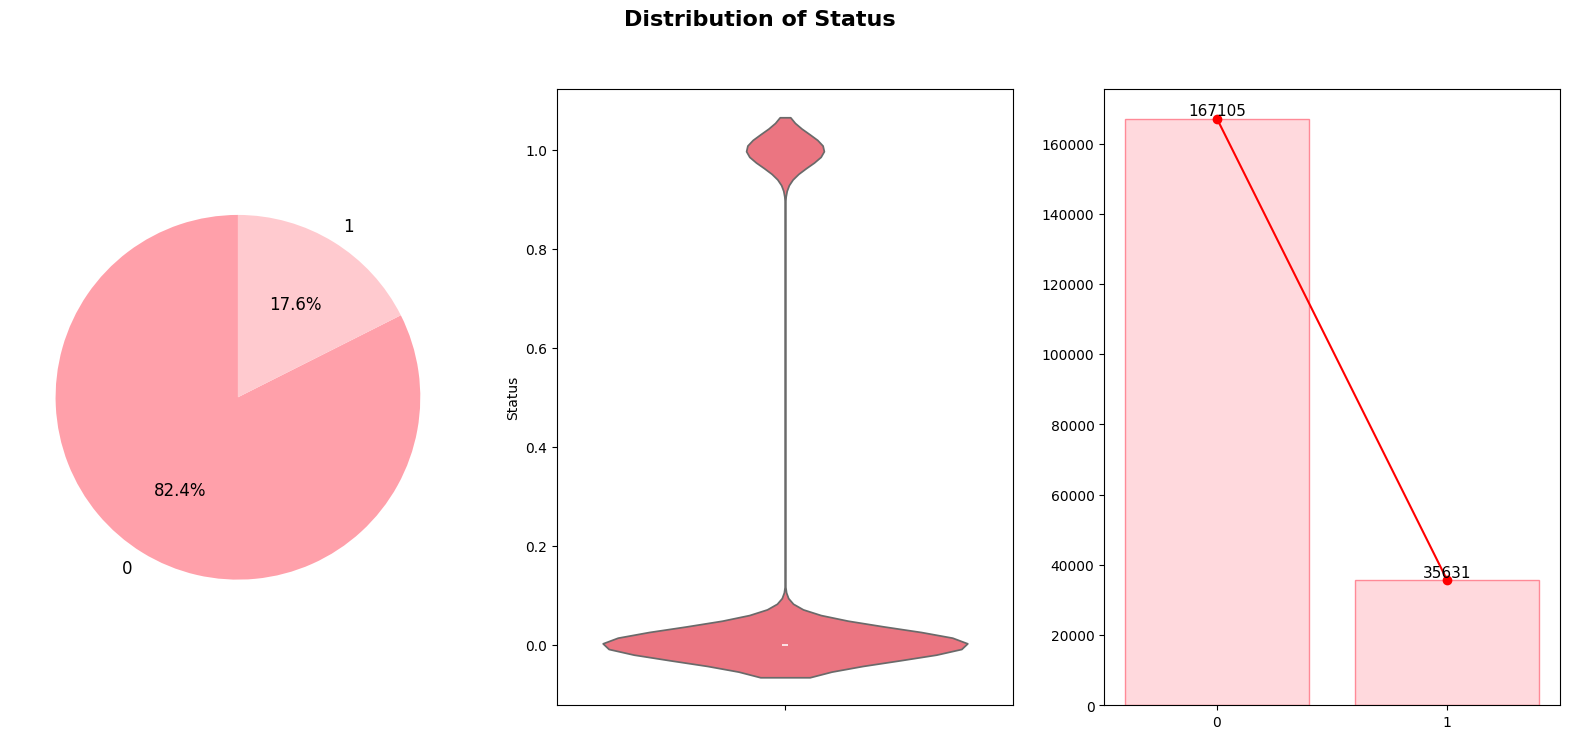

<Figure size 640x480 with 0 Axes>

In [111]:
neko.data_frequency("Status", df_train_cleaned)

### **Conclusion**

- **Distribution:**
  The target variable (`Status`) exhibits an imbalanced distribution, with a significantly higher proportion of instances belonging to class `0` (`82.4%`). Such a distribution poses challenges for predictive modeling, as models may become biased towards the majority class.

- **Mitigation Strategy:**
  To address this imbalance and ensure fair model performance across both classes, we will consider techniques like undersampling or oversampling (**SMOTE**) during model training. The specific technique will be chosen based on the outcome of the model performance evaluation.

- **Outliers:**
  As the data is categorical, the concept of outliers is less relevant for the target variable. However, we will continue to explore outliers in other features to ensure data quality and integrity.

- **Classification Task:**
  We will identify the problem as a binary classification task, aiming to predict whether a patient has diabetes (`1`) or not (`0`). Hence, we will focus on classification algorithms for model selection and evaluation.


## 4. Health Conditions (`HighBP`, `HighChol`, `Stroke`, `HeartDiseaseorAttack`, `BMI`)

### 4.1. Data Overview

In [160]:
data_overview(["HighBP", "HighChol", "Stroke", "HeartDiseaseorAttack", "BMI"])

┌────────────────────────────┐
│  Feature Essence (HighBP)  │
└────────────────────────────┘
╭────┬────────────────────────┬─────────────────────╮
│    │ Attribute              │ Value               │
├────┼────────────────────────┼─────────────────────┤
│  0 │ Data Type              │ int64               │
├────┼────────────────────────┼─────────────────────┤
│  1 │ Total / Missing Values │ 202736 / 0          │
├────┼────────────────────────┼─────────────────────┤
│  2 │ Range                  │ 0 - 1               │
├────┼────────────────────────┼─────────────────────┤
│  3 │ Percentiles (25-75)    │ 0.0 - 1.0           │
├────┼────────────────────────┼─────────────────────┤
│  4 │ Median                 │ 0.0                 │
├────┼────────────────────────┼─────────────────────┤
│  5 │ Mean                   │ 0.42906045300292006 │
├────┼────────────────────────┼─────────────────────┤
│  6 │ Standard Deviation     │ 0.49494321794126617 │
╰────┴────────────────────────┴────────────

### 4.2 Frequency Distribution

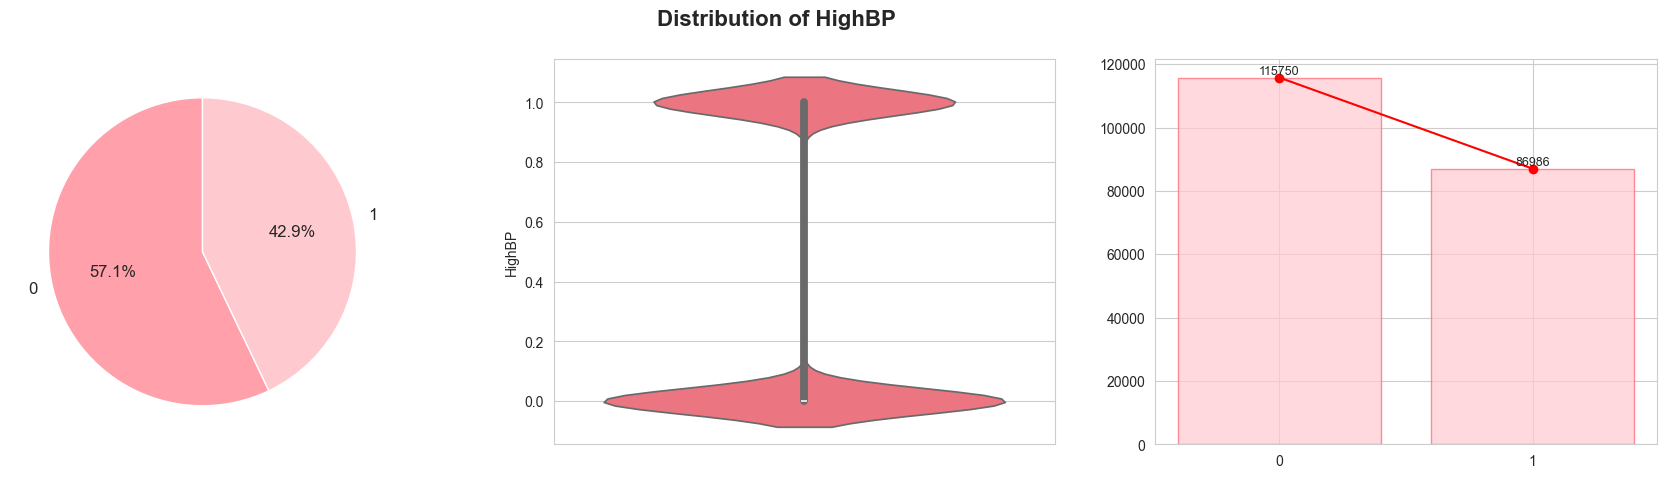

<Figure size 640x480 with 0 Axes>

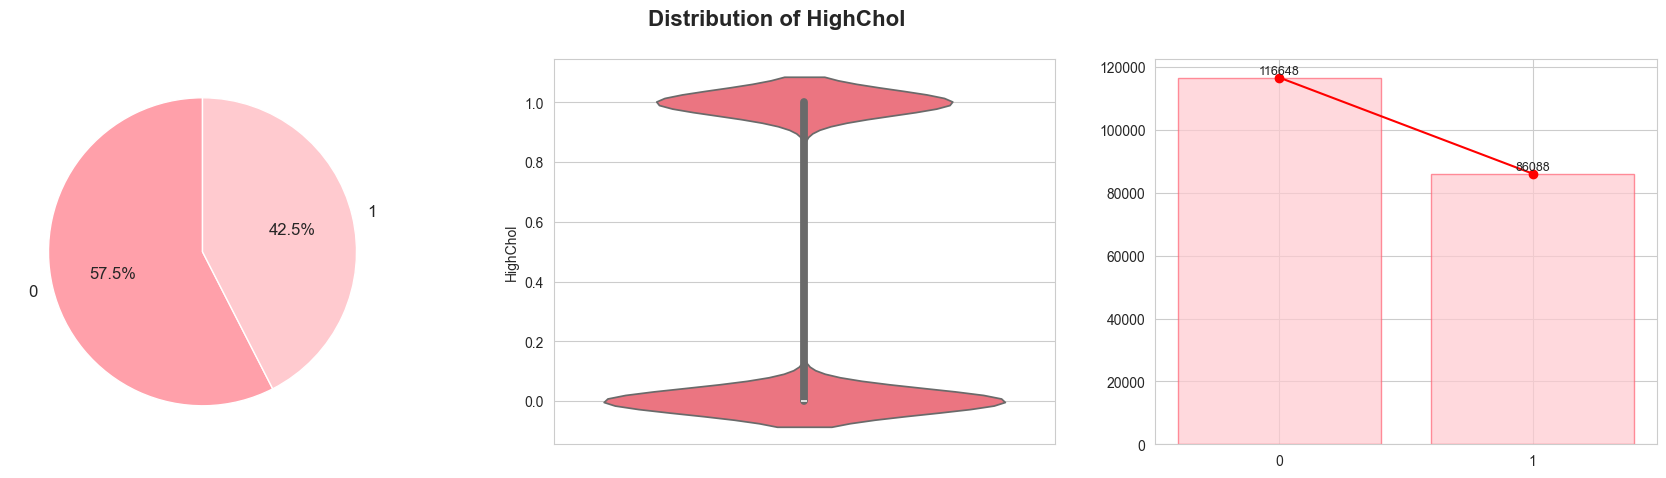

<Figure size 640x480 with 0 Axes>

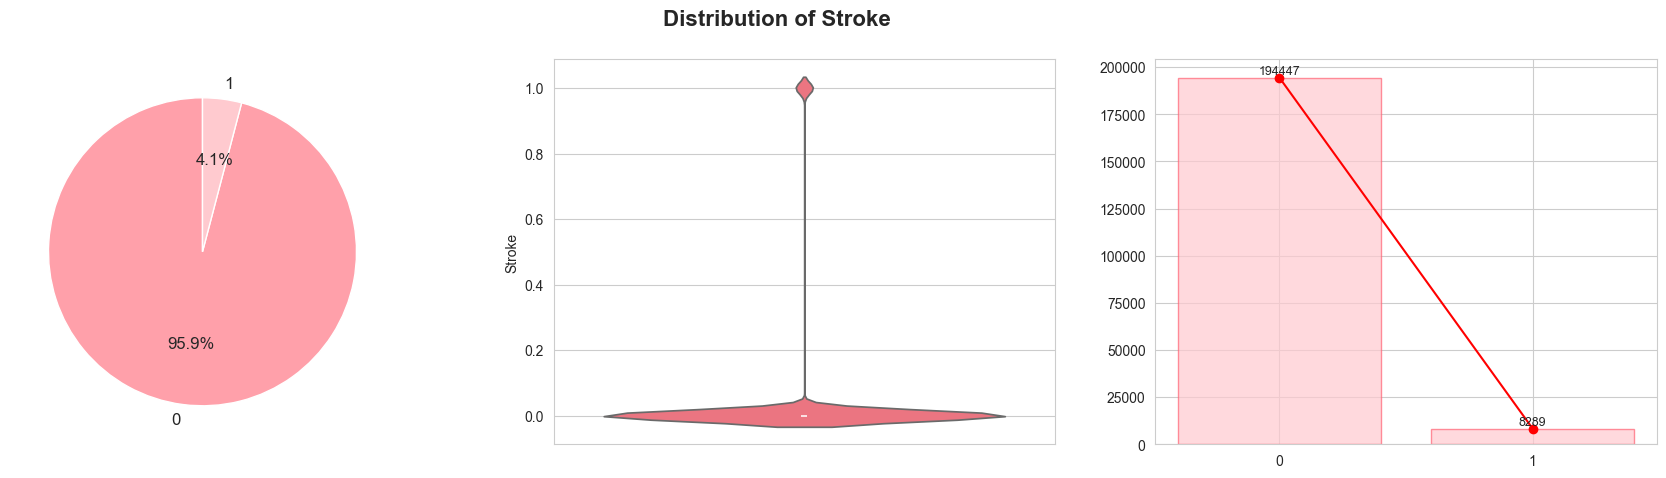

<Figure size 640x480 with 0 Axes>

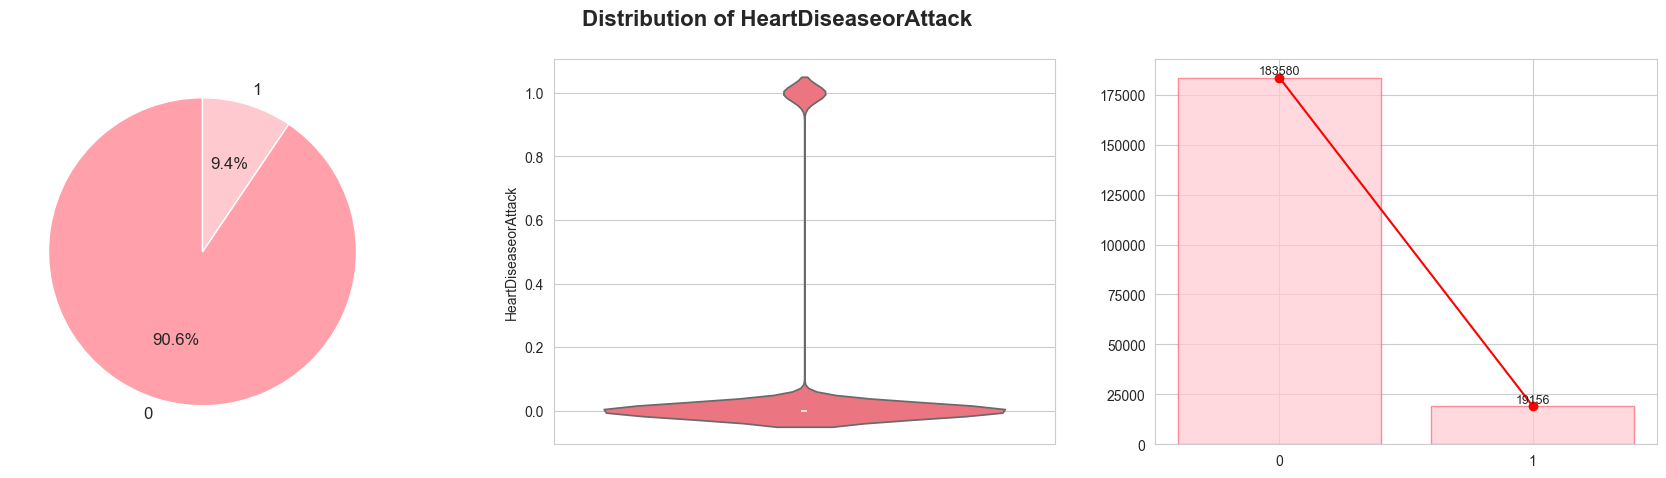

<Figure size 640x480 with 0 Axes>

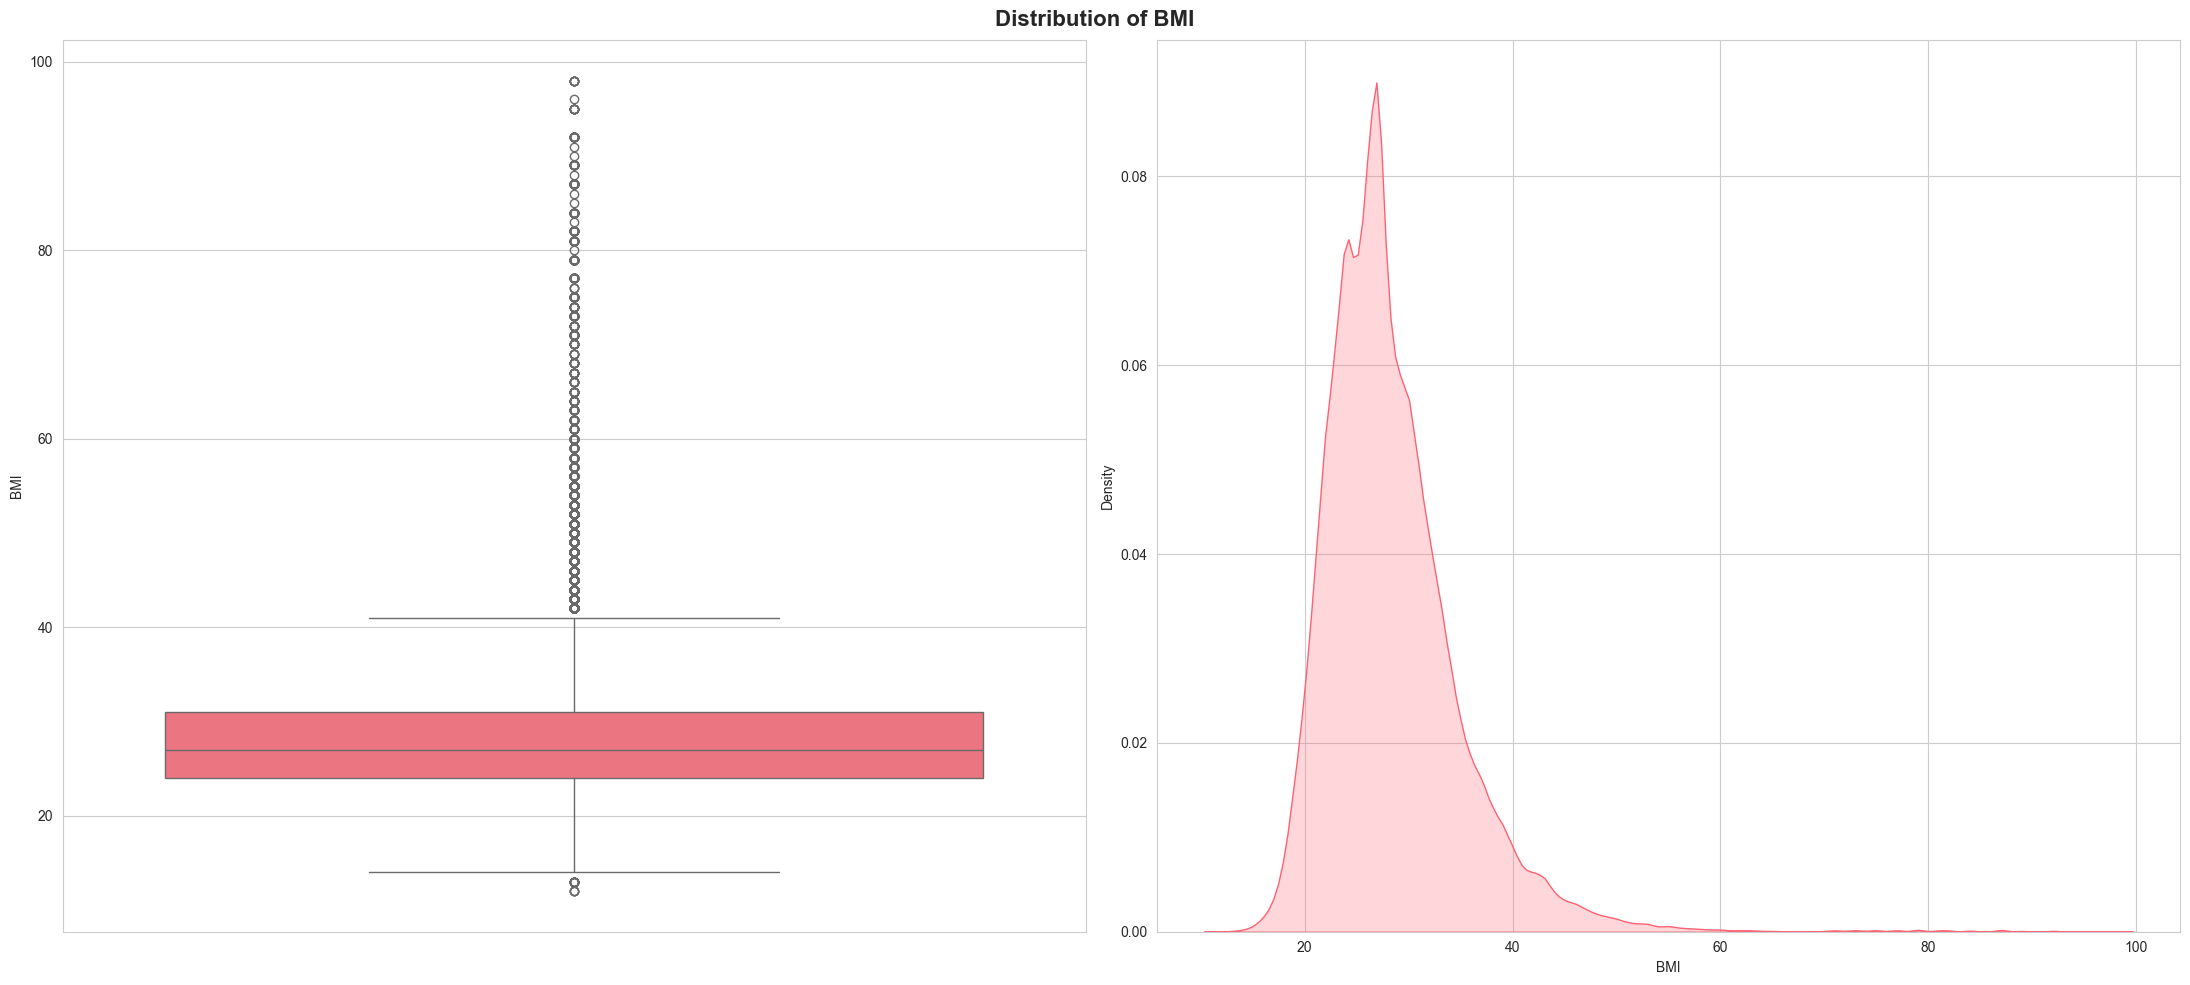

In [222]:
data_frequency(["HighBP", "HighChol", "Stroke", "HeartDiseaseorAttack"])
data_frequency(["BMI"], is_violin_plot=False, is_pie_chart=False, is_box_plot=True, is_kde=True ,figsize=(22, 10))

### 4.3. Outliers Detection

In [205]:
# Perform outlier detection using IQR (Only for continuous columns)
print(outlier_detector.find_outliers_iqr(df_train_cleaned["BMI"]))

╭─────────────────┬─────────────────────────╮
│ Key             │ Value                   │
├─────────────────┼─────────────────────────┤
│ Unique Outliers │ 12, 13, 42, 43, 44, ... │
├─────────────────┼─────────────────────────┤
│ Lower Bound     │ 13.5                    │
├─────────────────┼─────────────────────────┤
│ Upper Bound     │ 41.5                    │
├─────────────────┼─────────────────────────┤
│ Threshold       │ 1.5                     │
├─────────────────┼─────────────────────────┤
│ Total Outliers  │ 7859                    │
╰─────────────────┴─────────────────────────╯


### **Conclusion**

Our analysis revealed that features like **HighBP** (high blood pressure), **HighChol** (high cholesterol), **Stroke**, **HeartDiseaseorAttack**, and **BMI** (Body Mass Index) offer valuable insights for understanding patient health. These features can be categorized as:

- **Binary Features:** **HighBP**, **HighChol**, **Stroke**, and **HeartDiseaseorAttack**. These features indicate either the presence or absence of a specific condition (`0` or `1`).
- **Continuous Feature:** **BMI**. This feature represents a numerical value on a continuous scale.

**Binary Features:** 
- The distribution of **Stroke** and **HeartDiseaseorAttack** is skewed towards the negative (absence of the condition), with only `4%` and `9.4%` of patients having a history, respectively. 
- In contrast, **HighBP** and **HighChol** exhibit a more balanced distribution, with around `57%` of patients having one or the other.
  
  &rArr; It's important to note that some values within these features might appear unusual, but **they shouldn't be automatically classified as outliers**. Categorical variables, unlike continuous variables, often encompass diverse ranges of data.

**Continuous Feature (BMI):** 
- The **BMI** distribution is right-skewed, meaning there are more individuals with lower **BMI** values. This skewness might affect certain models that assume normal data distribution. We'll address this during data preprocessing (discussed further in the Bivariate Analysis section).

  &rArr; While the assignment instructions don't specify a valid **BMI** range, some data points might appear extreme. We'll address potential **BMI** outliers in the Bivariate Analysis section, where we can see their impact on the target variable.


## 5. Lifestyle Factors (`Smoker`, `PhysActivity`, `Fruits`, `Veggies`, `HvyAlcoholConsump`)

### 5.1. Data Overview

In [152]:
data_overview(["Smoker", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump"])

┌────────────────────────────┐
│  Feature Essence (Smoker)  │
└────────────────────────────┘
╭────┬────────────────────────┬────────────────────╮
│    │ Attribute              │ Value              │
├────┼────────────────────────┼────────────────────┤
│  0 │ Data Type              │ int64              │
├────┼────────────────────────┼────────────────────┤
│  1 │ Total / Missing Values │ 202736 / 0         │
├────┼────────────────────────┼────────────────────┤
│  2 │ Range                  │ 0 - 1              │
├────┼────────────────────────┼────────────────────┤
│  3 │ Percentiles            │ 0.0 - 1.0          │
├────┼────────────────────────┼────────────────────┤
│  4 │ Median                 │ 0.0                │
├────┼────────────────────────┼────────────────────┤
│  5 │ Mean                   │ 0.4429701681003867 │
├────┼────────────────────────┼────────────────────┤
│  6 │ Standard Deviation     │ 0.4967381758710816 │
╰────┴────────────────────────┴────────────────────╯

┌────

### 5.2. Frequency Distribution

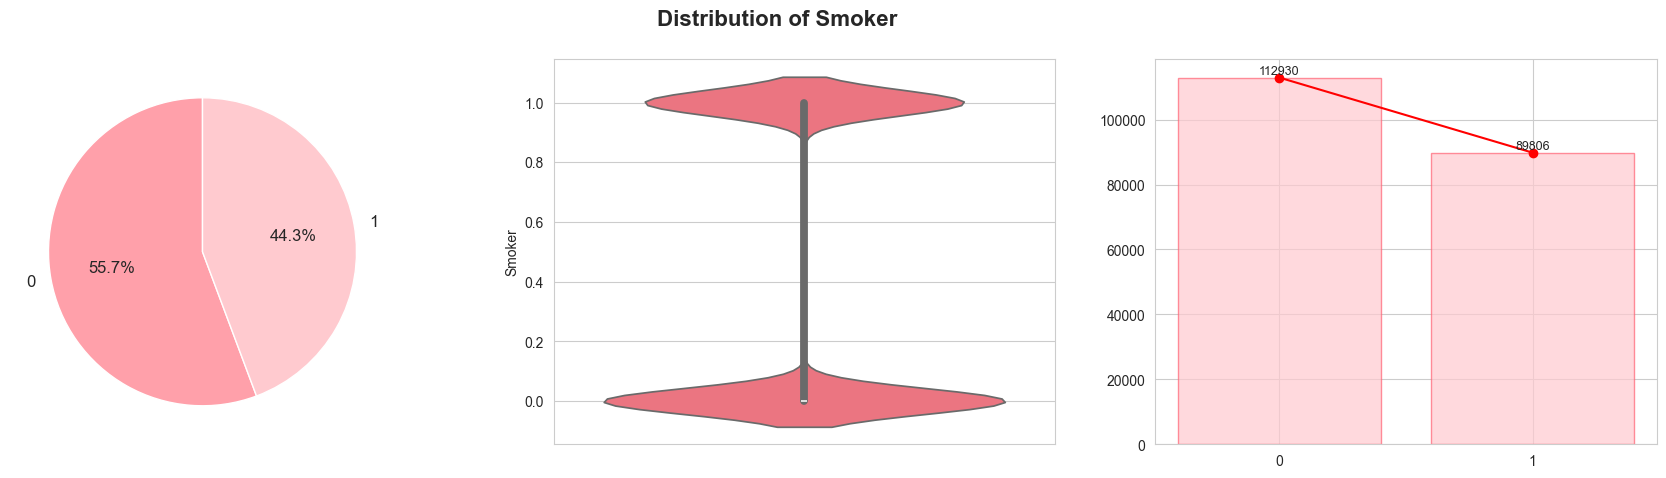

<Figure size 640x480 with 0 Axes>

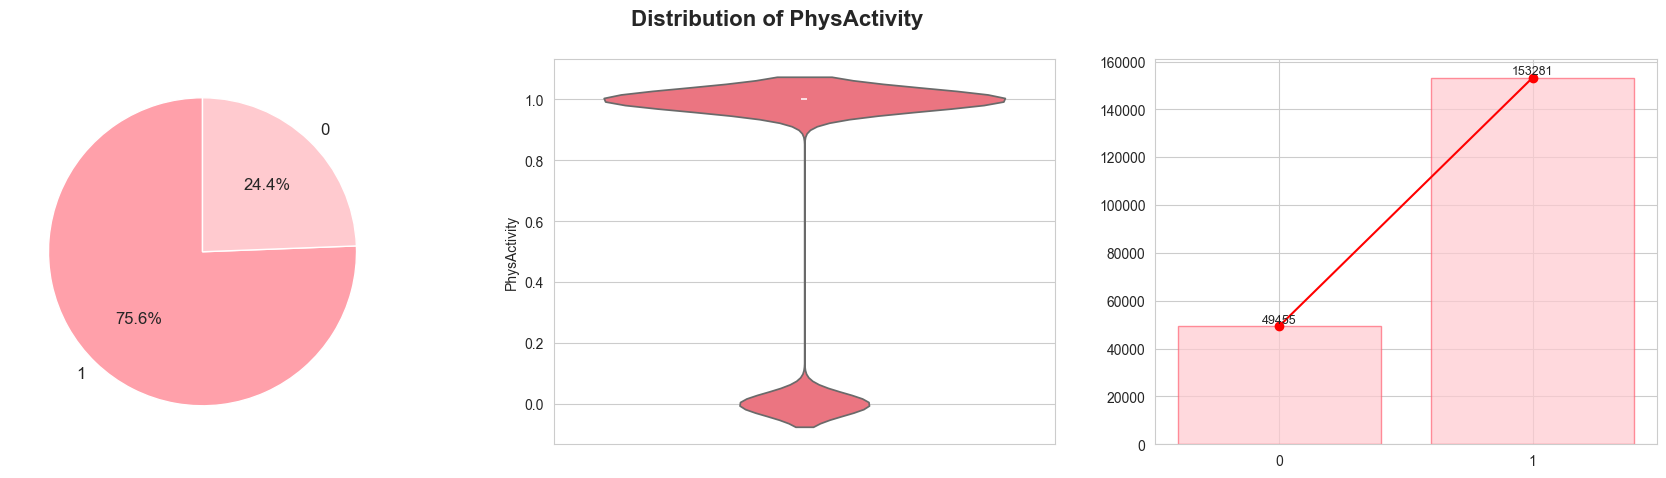

<Figure size 640x480 with 0 Axes>

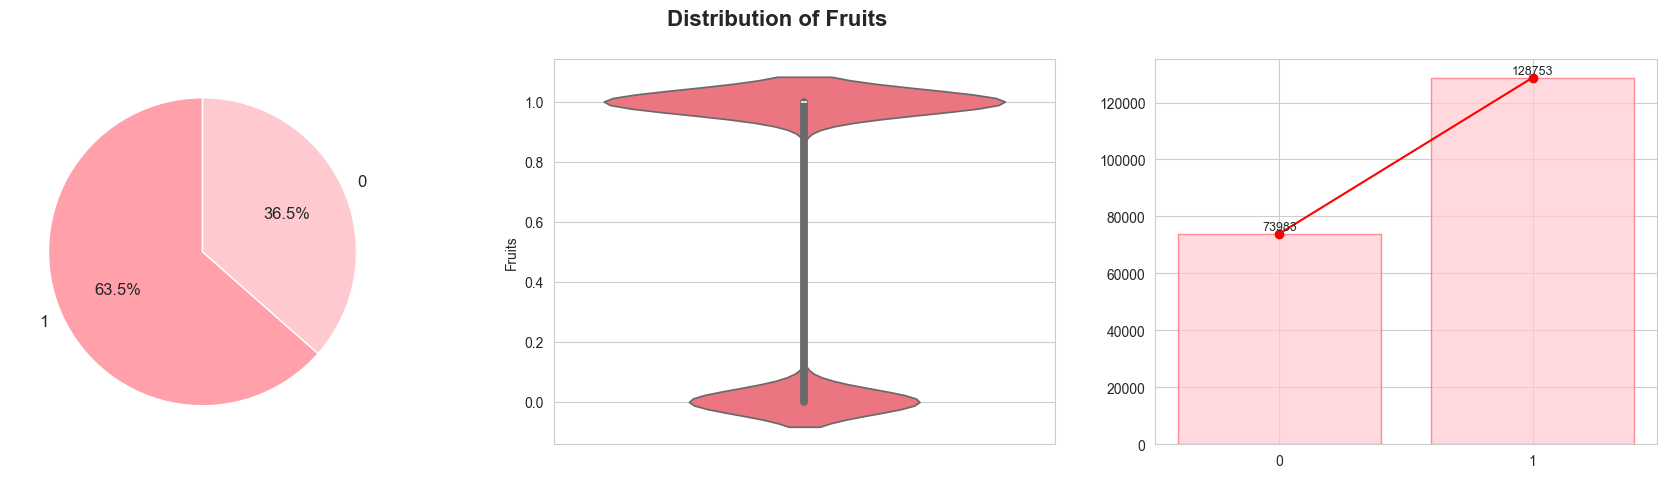

<Figure size 640x480 with 0 Axes>

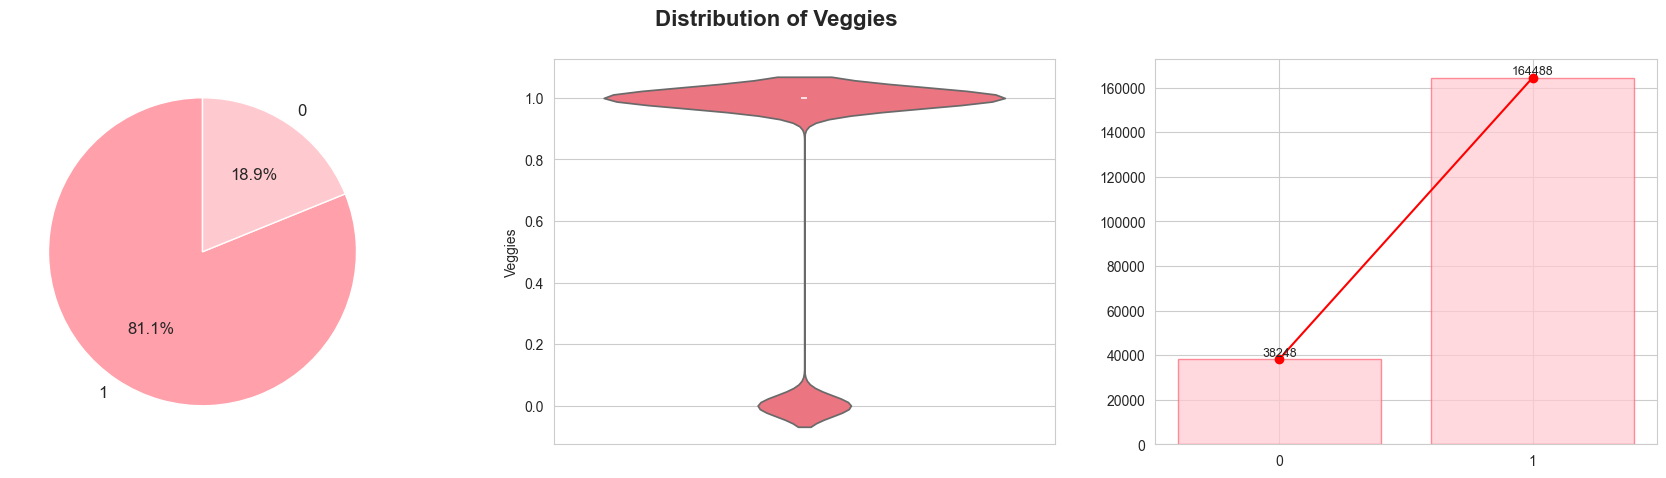

<Figure size 640x480 with 0 Axes>

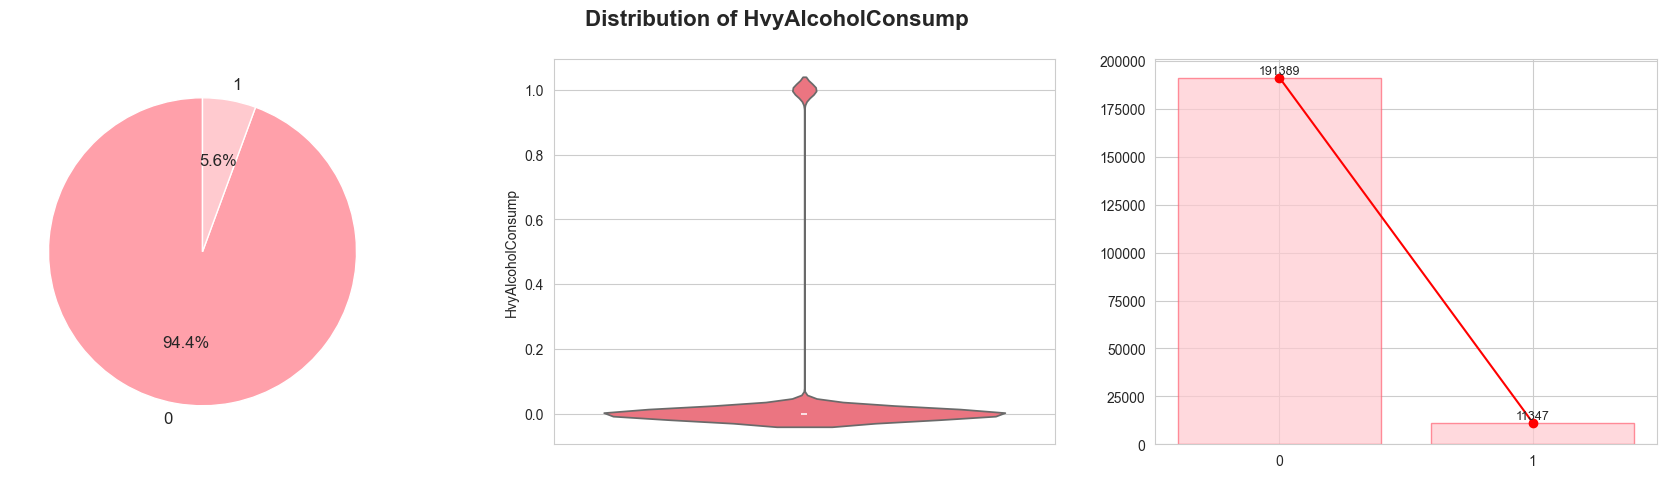

<Figure size 640x480 with 0 Axes>

In [153]:
data_frequency(["Smoker", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump"])

### **Conclusion**

- The lifestyle factors **Smoker**, **PhysActivity**, **Fruits**, **Veggies**, and **HvyAlcoholConsump** provide valuable insights into patients' habits and behaviors. These features are **categorical** (binary) and can significantly impact health outcomes (diabetes status).

- The frequency distribution of these features reveals interesting patterns:
  - **Smoker:** Approximately `55.7%` of patients are smokers.
  - **PhysActivity:** A significant proportion (`75.6%`) of patients engage in physical activity.
  - **Fruits and Veggies:** Over `60%` of patients consume fruits and `81%` vegetables daily.
  - **HvyAlcoholConsump:** Only `5.6%` of patients engage in heavy alcohol consumption.

- These features will be crucial for understanding the relationship between lifestyle choices and diabetes status. They can also help identify potential risk factors. (Discuss further in bivariate analysis)
- As these features are binary, the concept of outliers is less relevant. However, we'll continue to explore potential outliers in other features to ensure data quality and integrity.


## 6. Health Care (`CholCheck`, `AnyHealthcare`, `NoDocbcCost`)

### 6.1. Data Overview

In [156]:
data_overview(["CholCheck", "AnyHealthcare", "NoDocbcCost"])

┌───────────────────────────────┐
│  Feature Essence (CholCheck)  │
└───────────────────────────────┘
╭────┬────────────────────────┬─────────────────────╮
│    │ Attribute              │ Value               │
├────┼────────────────────────┼─────────────────────┤
│  0 │ Data Type              │ int64               │
├────┼────────────────────────┼─────────────────────┤
│  1 │ Total / Missing Values │ 202736 / 0          │
├────┼────────────────────────┼─────────────────────┤
│  2 │ Range                  │ 0 - 1               │
├────┼────────────────────────┼─────────────────────┤
│  3 │ Percentiles (25-75)    │ 1.0 - 1.0           │
├────┼────────────────────────┼─────────────────────┤
│  4 │ Median                 │ 1.0                 │
├────┼────────────────────────┼─────────────────────┤
│  5 │ Mean                   │ 0.9626213400678715  │
├────┼────────────────────────┼─────────────────────┤
│  6 │ Standard Deviation     │ 0.18968835808831394 │
╰────┴────────────────────────┴───

### 6.2. Frequency Distribution

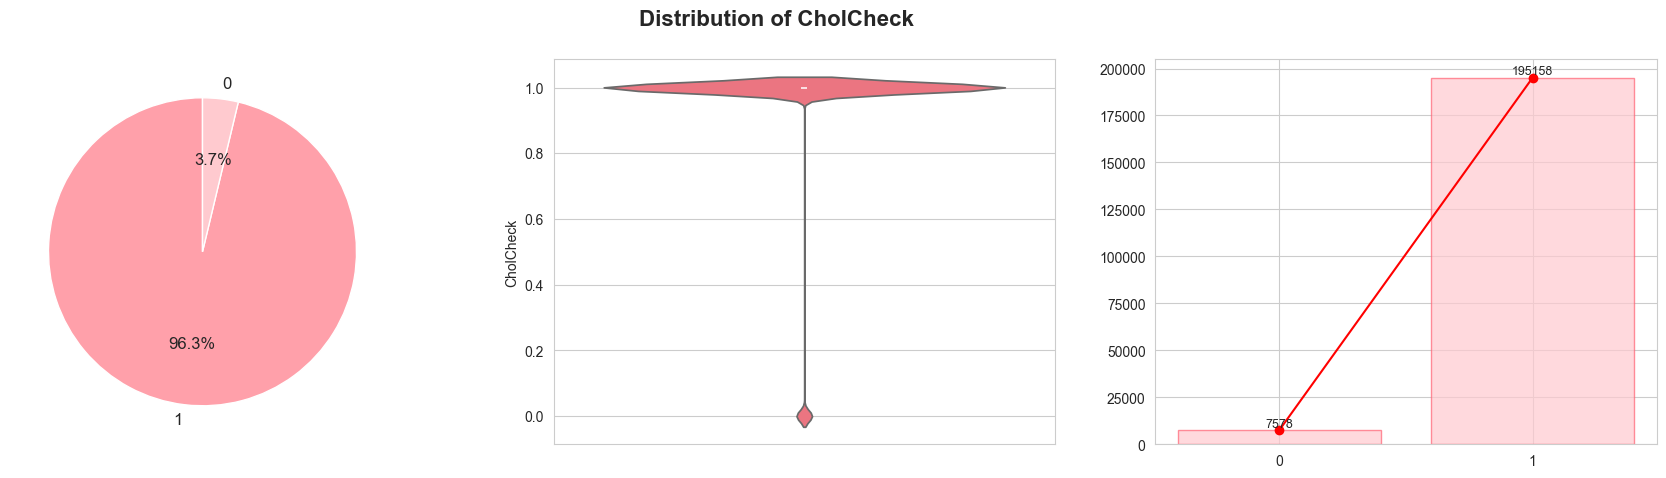

<Figure size 640x480 with 0 Axes>

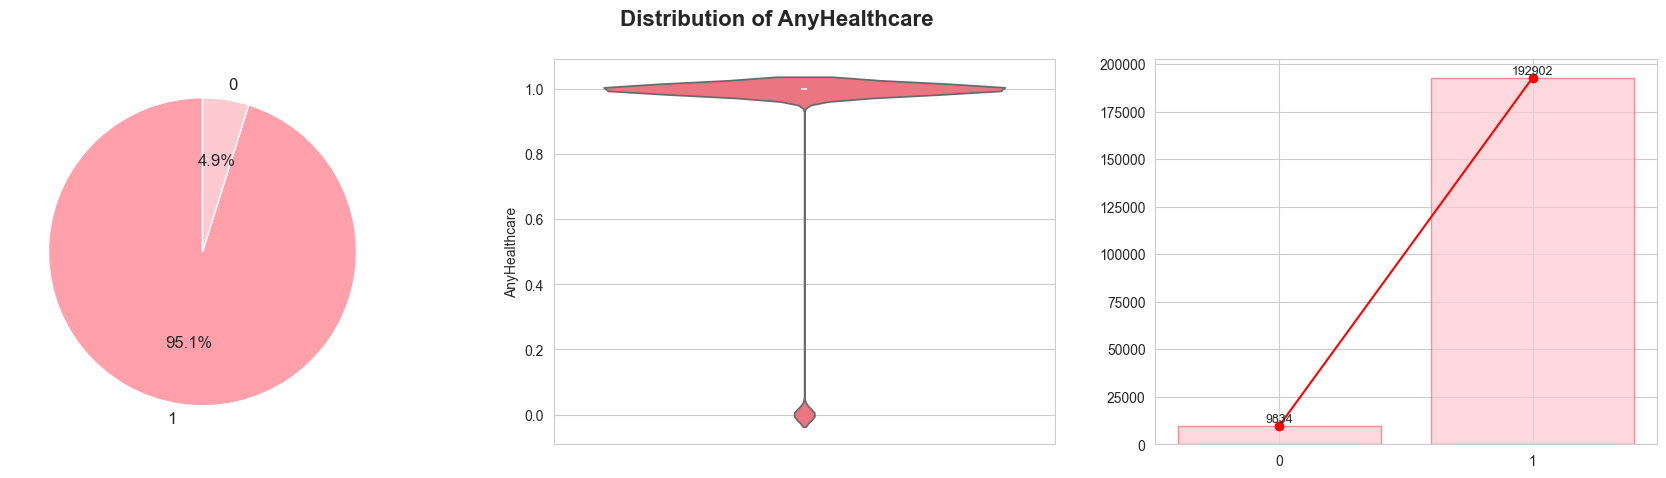

<Figure size 640x480 with 0 Axes>

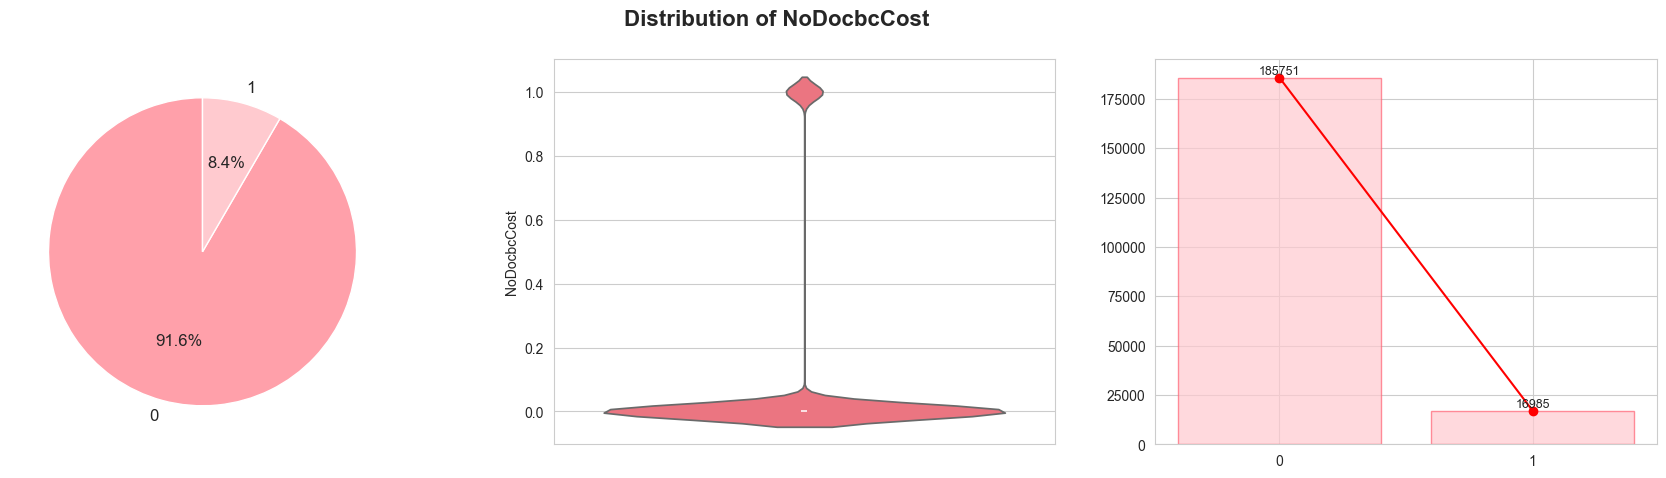

<Figure size 640x480 with 0 Axes>

In [206]:
data_frequency(["CholCheck", "AnyHealthcare", "NoDocbcCost"])

### **Conclusion**

- The health care-related features **CholCheck**, **AnyHealthcare**, and **NoDocbcCost** provide insights into patients' access to health services and potential barriers to care. These features are **categorical** and can influence health outcomes, including diabetes status. Although, they are **not direct** indicators of diabetes status, they can provide valuable context for understanding the patient population and their health behaviors. 

- The frequency distribution of these features reveals the following patterns:
  - **CholCheck:** Approximately `96.3%` of patients have had a cholesterol check in the last 5 years.
  - **AnyHealthare:** The majority of patients (`95.1%`) have health care coverage.
  - **NoDocbcCost:** A small proportion of patients (`8.4%`) reported being unable to see a doctor due to cost.
  
- Since these features are binary, the concept of outliers is less relevant. However, we'll continue to explore potential outliers in other features to ensure data quality and integrity.

## 7. General Health (`GenHlth`, `MentHlth`, `PhysHlth`, `DiffWalk`)

### 7.1. Data Overview

In [207]:
data_overview(["GenHlth", "MentHlth", "PhysHlth", "DiffWalk"])

┌─────────────────────────────┐
│  Feature Essence (GenHlth)  │
└─────────────────────────────┘
╭────┬────────────────────────┬────────────────────╮
│    │ Attribute              │ Value              │
├────┼────────────────────────┼────────────────────┤
│  0 │ Data Type              │ int64              │
├────┼────────────────────────┼────────────────────┤
│  1 │ Total / Missing Values │ 202736 / 0         │
├────┼────────────────────────┼────────────────────┤
│  2 │ Range                  │ 1 - 5              │
├────┼────────────────────────┼────────────────────┤
│  3 │ Percentiles (25-75)    │ 2.0 - 3.0          │
├────┼────────────────────────┼────────────────────┤
│  4 │ Median                 │ 2.0                │
├────┼────────────────────────┼────────────────────┤
│  5 │ Mean                   │ 2.5151625759608556 │
├────┼────────────────────────┼────────────────────┤
│  6 │ Standard Deviation     │ 1.0701984100152888 │
╰────┴────────────────────────┴────────────────────╯

┌─

### 7.2. Frequency Distribution

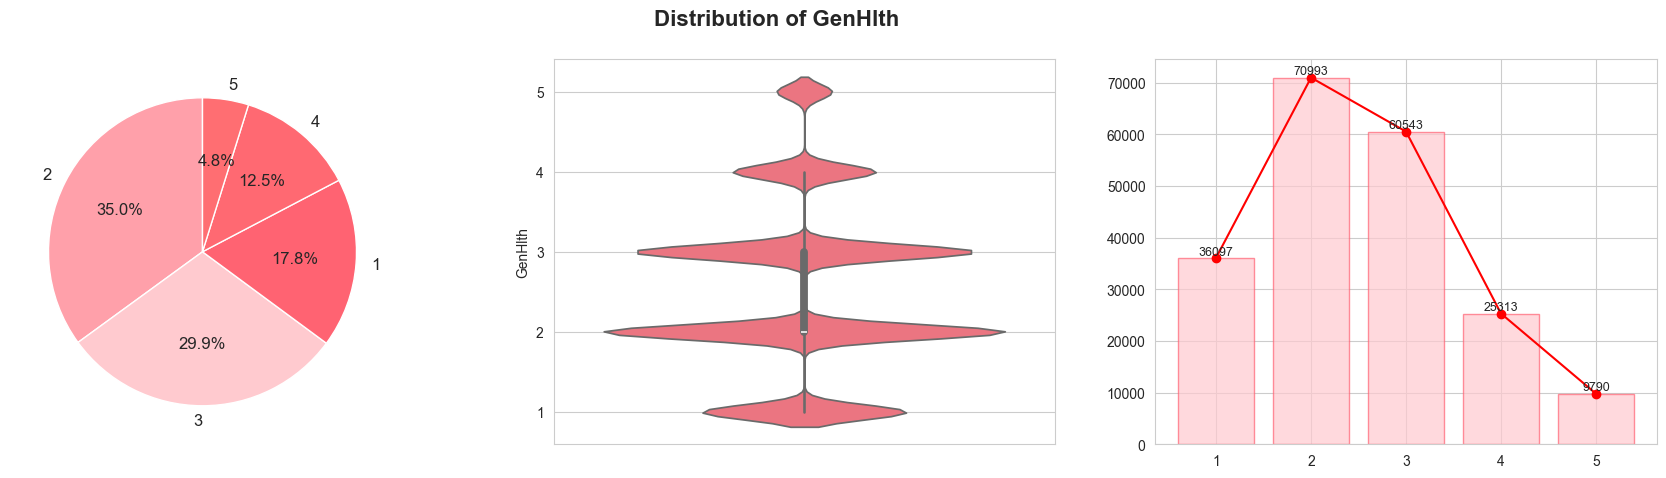

<Figure size 640x480 with 0 Axes>

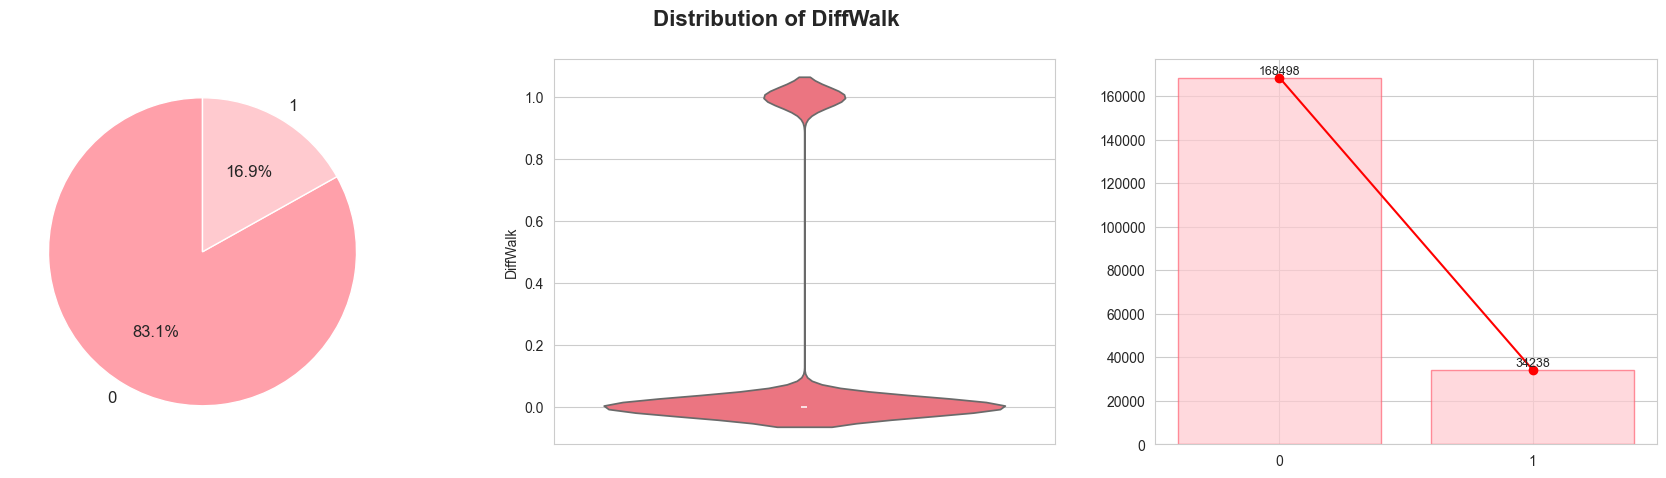

<Figure size 640x480 with 0 Axes>

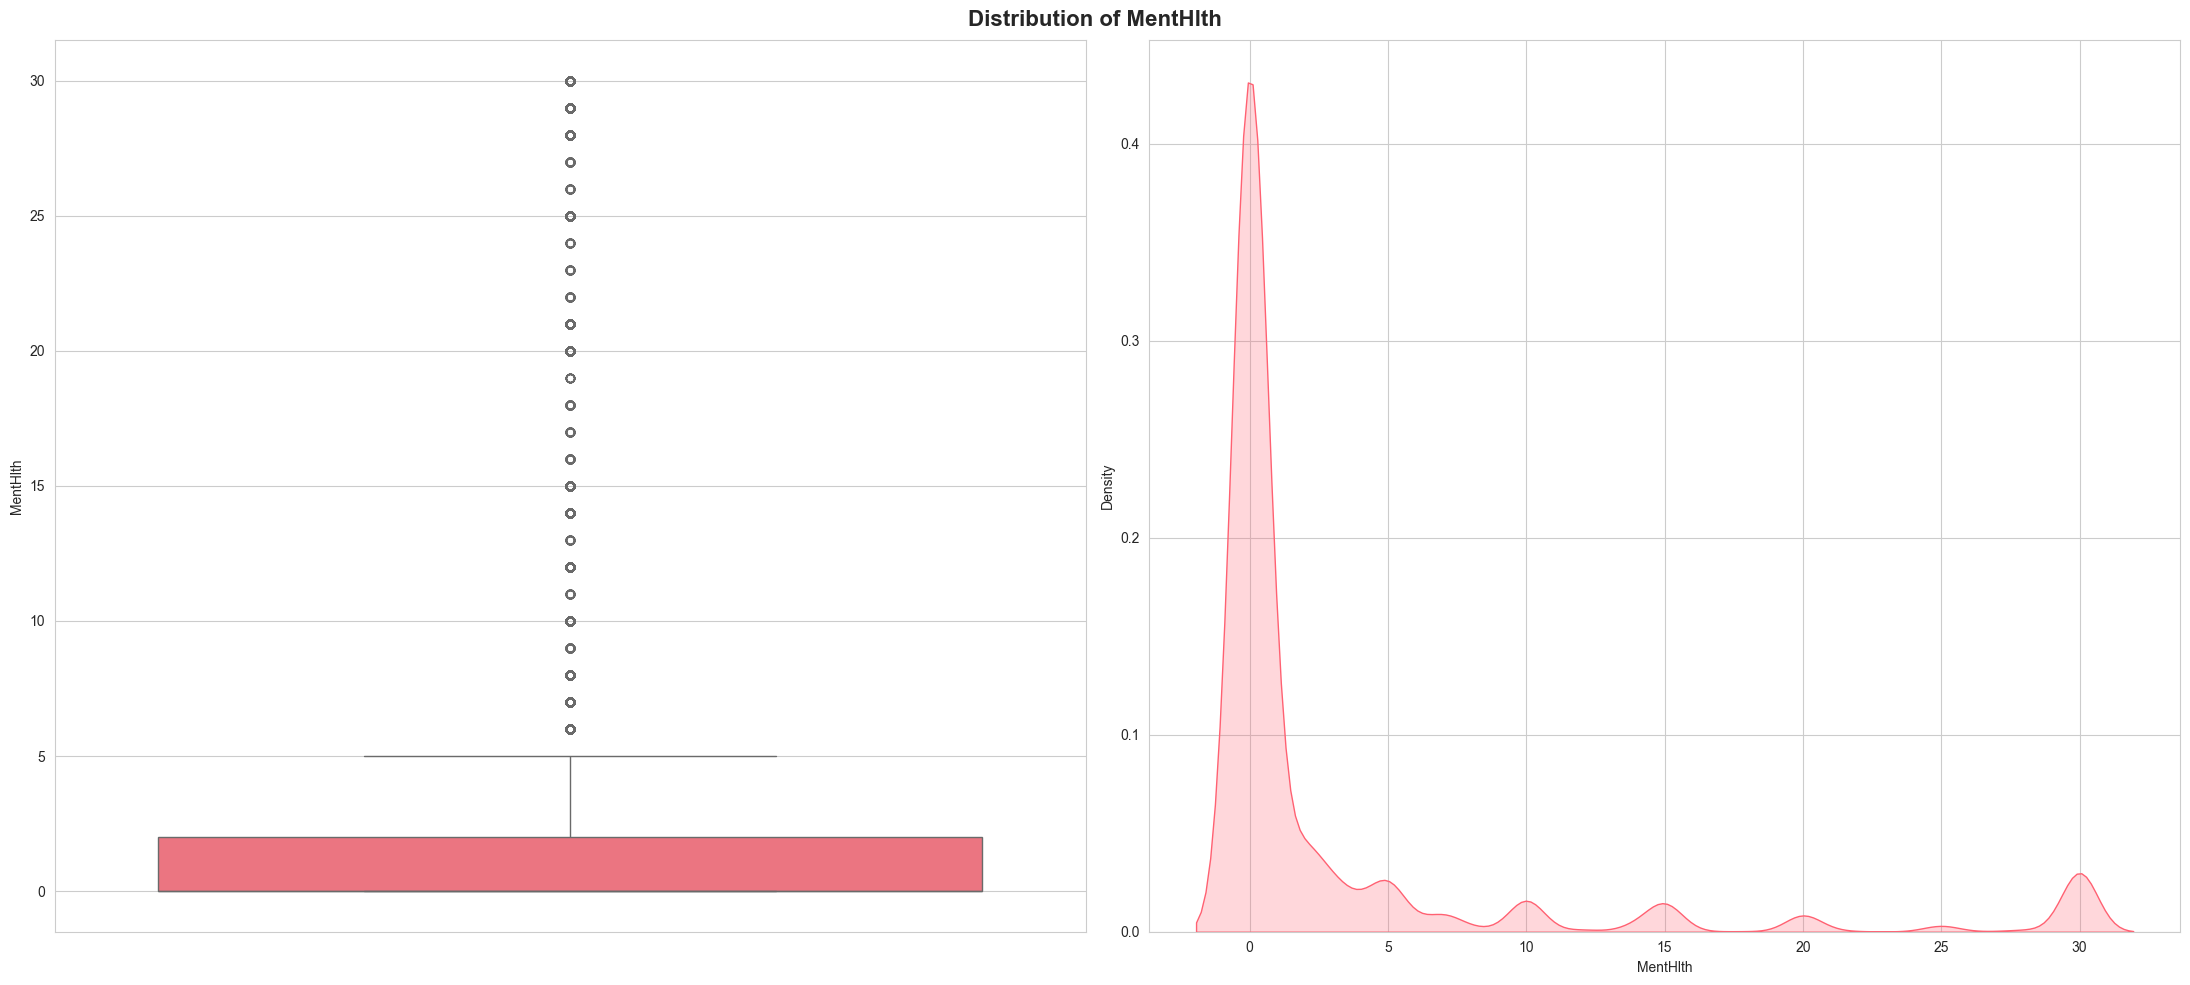

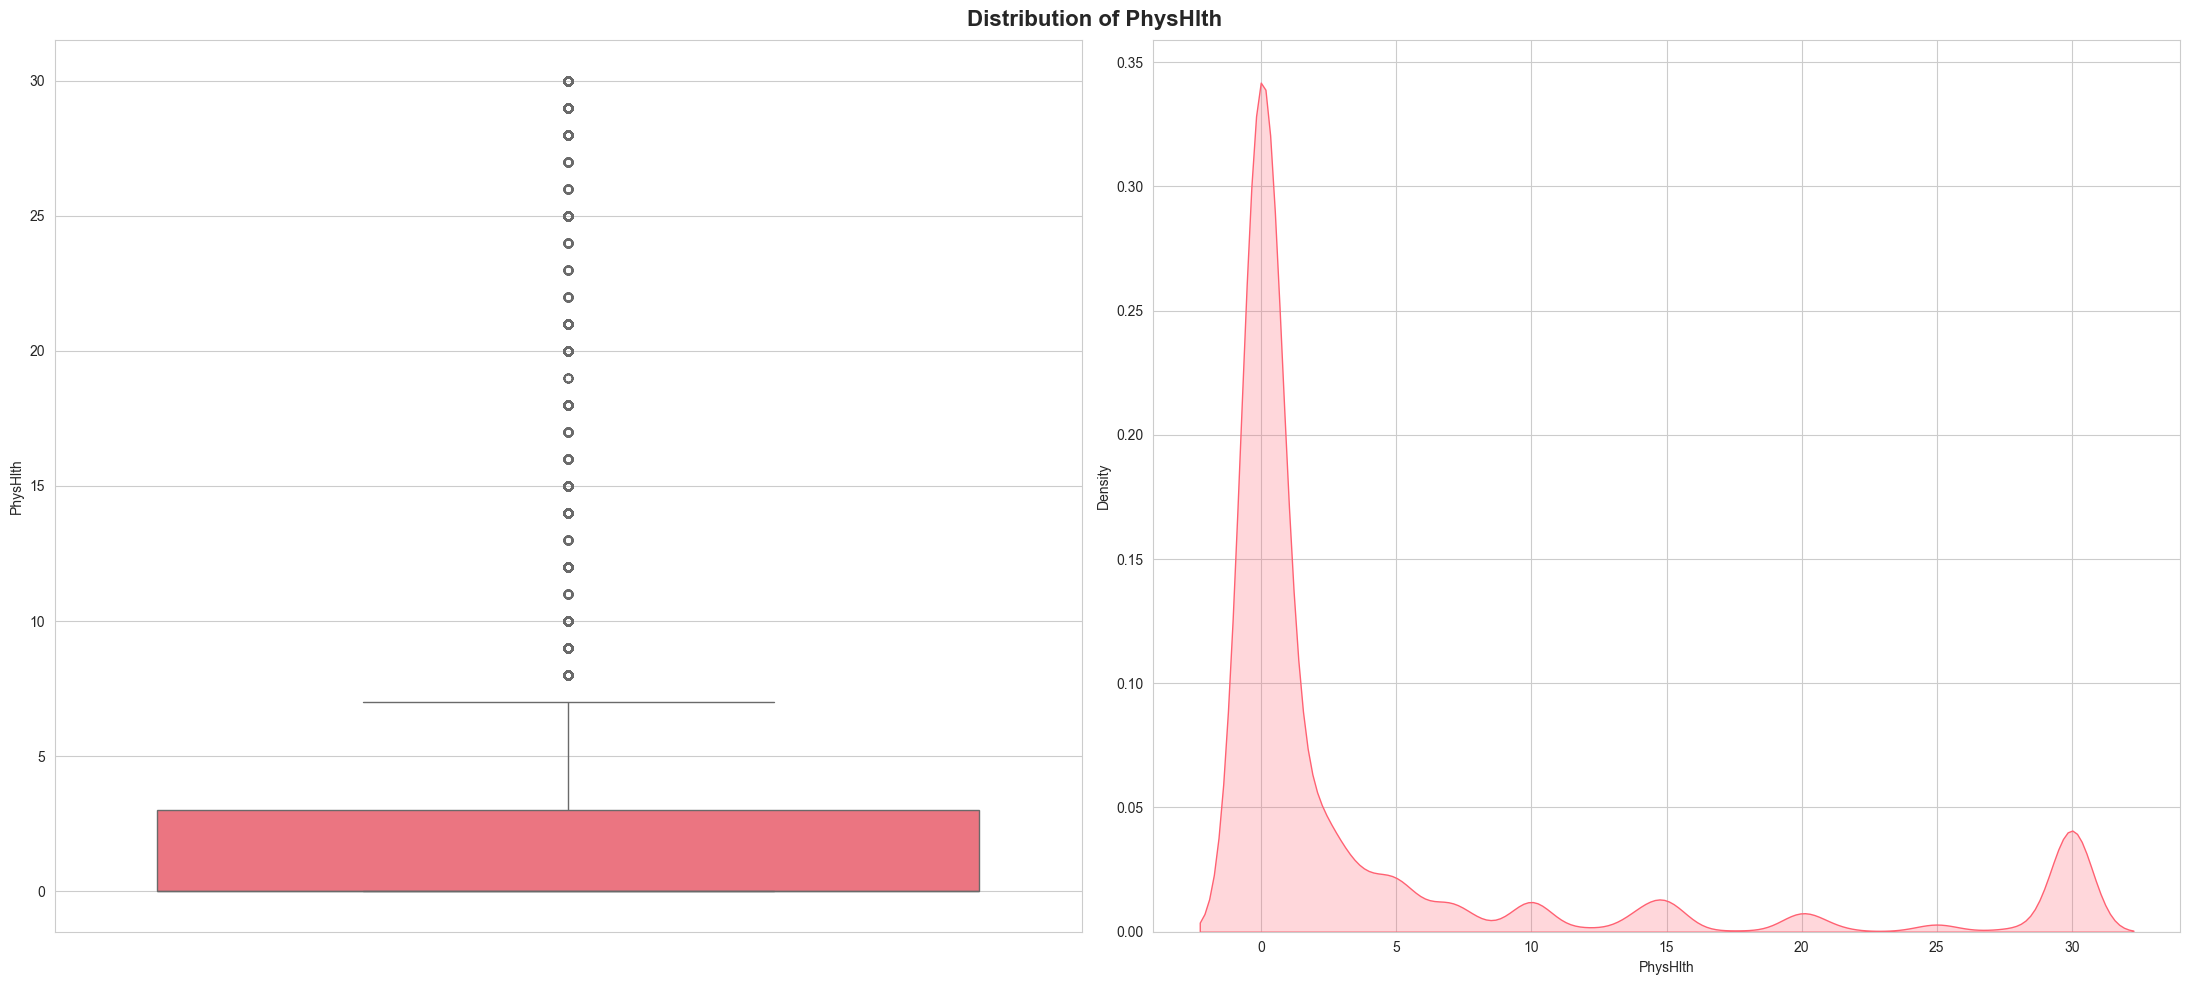

In [211]:
data_frequency(["GenHlth", "DiffWalk"])
data_frequency(
    ["MentHlth", "PhysHlth"],
    is_violin_plot=False,
    is_pie_chart=False,
    is_box_plot=True,
    figsize=(22, 10),
)

### 7.3. Outliers Detection

In [216]:
styler.draw_box("Outlier Detection (IQR): MentHlth")
print(outlier_detector.find_outliers_iqr(df_train_cleaned["MentHlth"]))

print()

styler.draw_box("Outlier Detection (IQR): PhysHlth")
print(outlier_detector.find_outliers_iqr(df_train_cleaned["PhysHlth"]))

┌─────────────────────────────────────┐
│  Outlier Detection (IQR): MentHlth  │
└─────────────────────────────────────┘
╭─────────────────┬─────────────────────╮
│ Key             │ Value               │
├─────────────────┼─────────────────────┤
│ Unique Outliers │ 6, 7, 8, 9, 10, ... │
├─────────────────┼─────────────────────┤
│ Lower Bound     │ -3.0                │
├─────────────────┼─────────────────────┤
│ Upper Bound     │ 5.0                 │
├─────────────────┼─────────────────────┤
│ Threshold       │ 1.5                 │
├─────────────────┼─────────────────────┤
│ Total Outliers  │ 29056               │
╰─────────────────┴─────────────────────╯

┌─────────────────────────────────────┐
│  Outlier Detection (IQR): PhysHlth  │
└─────────────────────────────────────┘
╭─────────────────┬───────────────────────╮
│ Key             │ Value                 │
├─────────────────┼───────────────────────┤
│ Unique Outliers │ 8, 9, 10, 11, 12, ... │
├─────────────────┼──────────────────

### **Conclusion**

This analysis examined various features, including **GenHlth** (general health), **MentHlth** (mental health - days with poor mental health in the past 30 days), **PhysHlth** (physical health - days with poor physical health in the past 30 days), and **DiffWalk** (difficulty walking or climbing stairs), to gain insights into patients' overall health status, mental and physical well-being, and mobility. While **GenHlth** and **DiffWalk** are categorical variables with distinct levels, **MentHlth** and **PhysHlth** were initially treated as continuous for this initial exploration.

The frequency distribution of these features reveals the following patterns:
  - **GenHlth:** The majority of patients (`65%`) reported positive general health, with ratings concentrated at levels 2 and 3.
  - **MentHlth:** The distribution of days with poor mental health in the past 30 days was skewed towards lower values (fewer bad days). However, it ranged from `0` to `30`, indicating some variation.
  - **PhysHlth:** Similar to mental health, the distribution of days with poor physical health was skewed towards lower values, with a range of `0` to `30`.
  - **DiffWalk:** A smaller portion of patients (`17%`) reported serious difficulty walking or climbing stairs.
  
**Outliers**

Outliers were identified in the **MentHlth** and **PhysHlth** features. Further analysis will be conducted to determine the appropriate treatment for these outliers. The concept of outliers is less relevant for **GenHlth** and **DiffWalk** due to their ordinal or binary nature.

## 8. Demographics (`Sex`, `Age`, `Education`, `Income`)

### 8.1. Data Overview

In [217]:
data_overview(["Sex","Age", "Education", "Income"])

┌─────────────────────────┐
│  Feature Essence (Sex)  │
└─────────────────────────┘
╭────┬────────────────────────┬─────────────────────╮
│    │ Attribute              │ Value               │
├────┼────────────────────────┼─────────────────────┤
│  0 │ Data Type              │ int64               │
├────┼────────────────────────┼─────────────────────┤
│  1 │ Total / Missing Values │ 202736 / 0          │
├────┼────────────────────────┼─────────────────────┤
│  2 │ Range                  │ 0 - 1               │
├────┼────────────────────────┼─────────────────────┤
│  3 │ Percentiles (25-75)    │ 0.0 - 1.0           │
├────┼────────────────────────┼─────────────────────┤
│  4 │ Median                 │ 0.0                 │
├────┼────────────────────────┼─────────────────────┤
│  5 │ Mean                   │ 0.4395765922184516  │
├────┼────────────────────────┼─────────────────────┤
│  6 │ Standard Deviation     │ 0.49633680794420815 │
╰────┴────────────────────────┴─────────────────────

### 8.2. Frequency Distribution

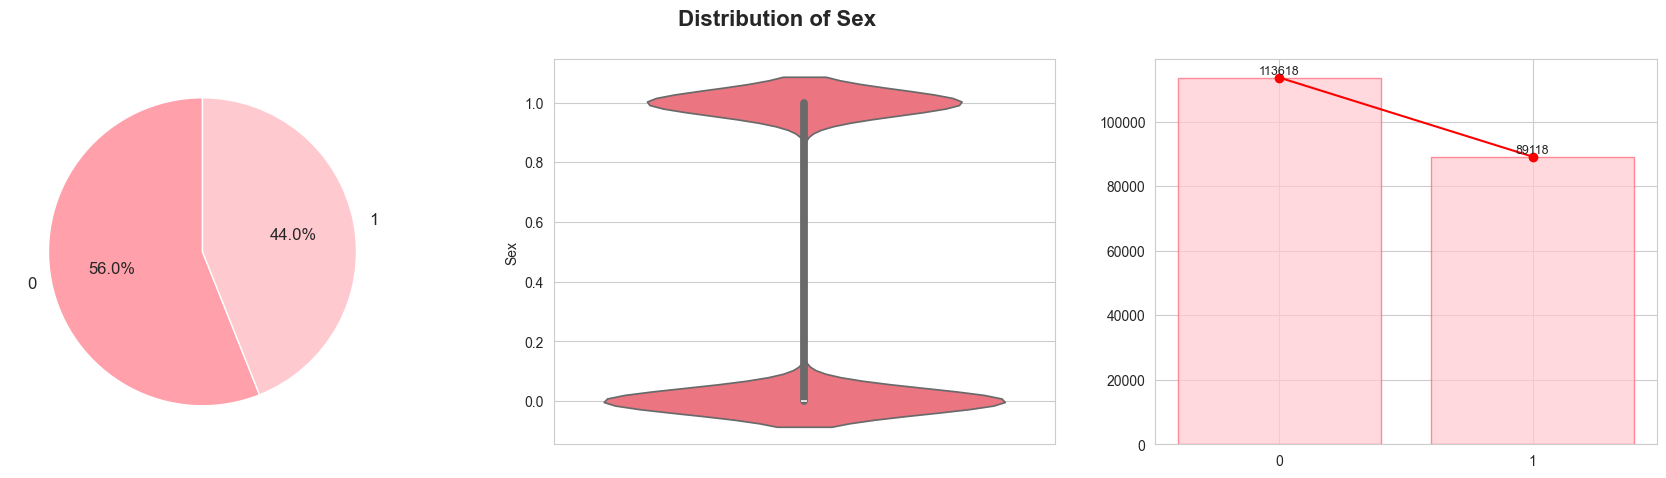

<Figure size 640x480 with 0 Axes>

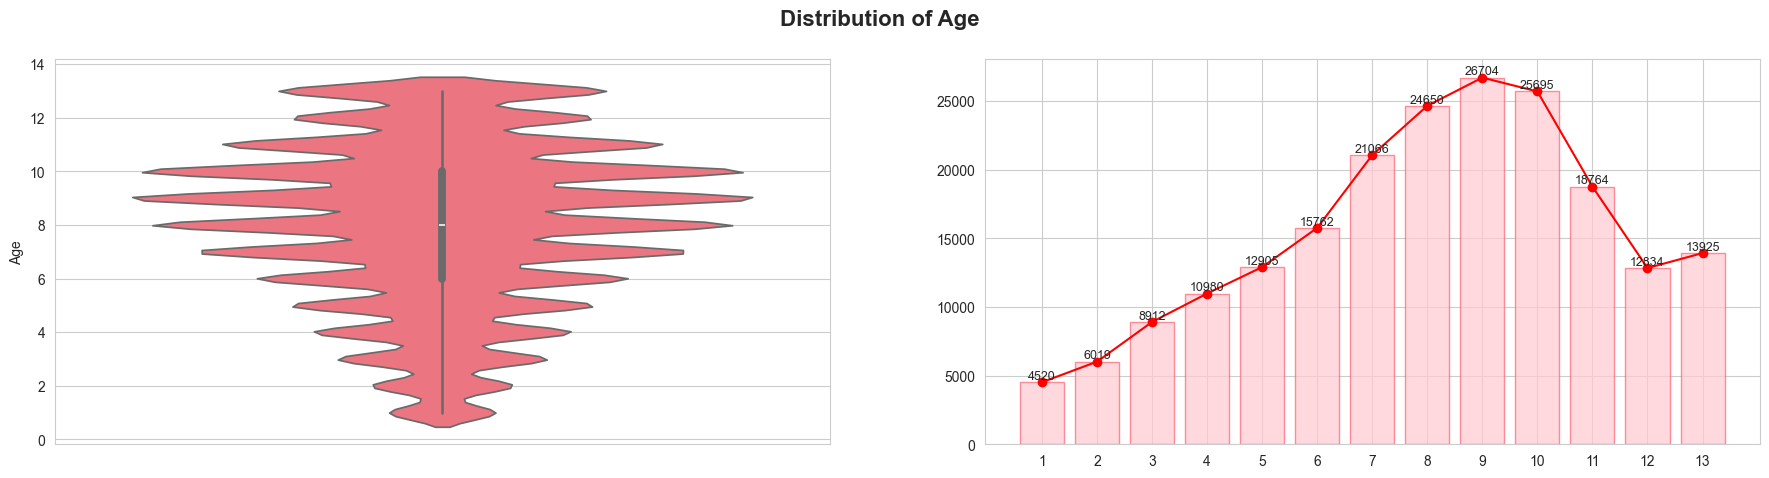

<Figure size 640x480 with 0 Axes>

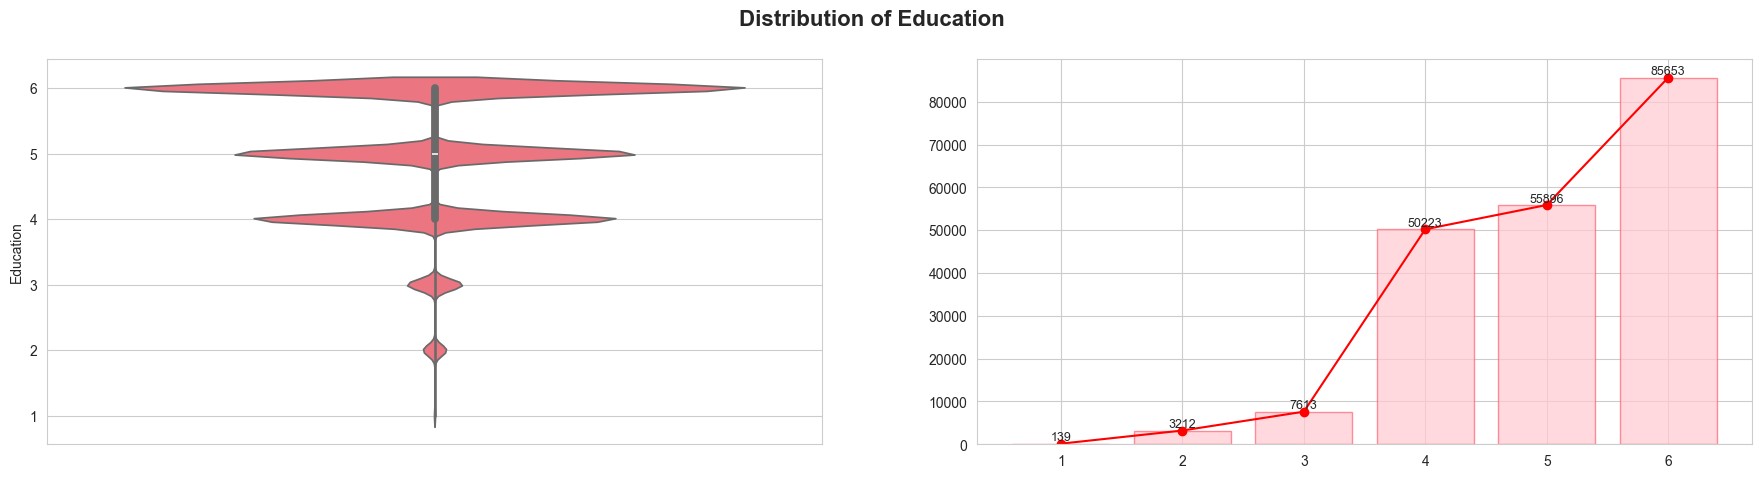

<Figure size 640x480 with 0 Axes>

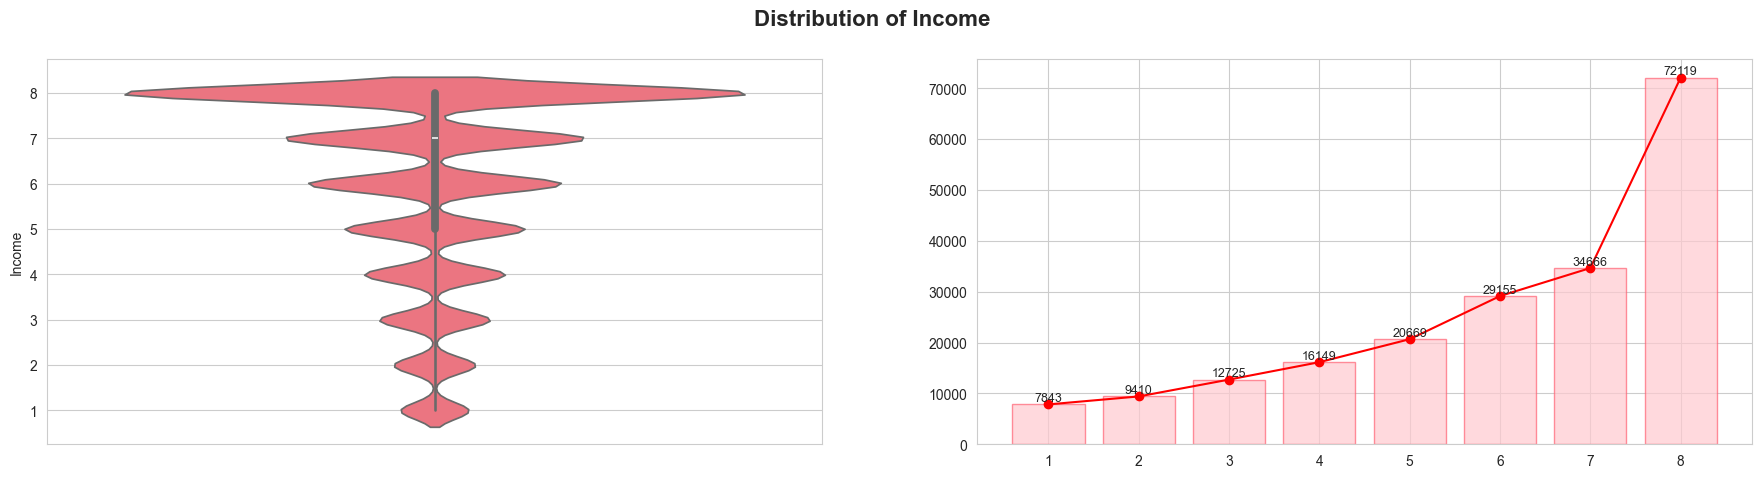

<Figure size 640x480 with 0 Axes>

In [225]:
data_frequency(["Sex"])
data_frequency(["Age", "Education", "Income"], is_violin_plot=True, is_pie_chart=False)

### **Conclusion**

This analysis investigated various demographic and socioeconomic characteristics of the patient population, including **sex**, **age**, **education level**, and **income**. These factors provide implicit context for understanding the patients and their potential health risks.

While not directly indicative of diabetes status, these characteristics can help identify potential risk factors to inform targeted interventions. The analysis revealed the following key findings:

- **Sex Distribution:** The dataset exhibits a balanced distribution, with approximately `56%` of patients identified as male.
- **Age:** The majority of patients fall within the `7-10` age group.
- **Education:** A significant portion of the patient population has completed `Grade 12` or a `GED` equivalent.
- **Income:** The majority of patients fall within the income range of level `8`.

Given the categorical or ordinal nature of these features, **the concept of outliers is less applicable**. However, further analysis will explore potential outliers in other features to ensure overall data quality and integrity.



## 9. Additional Tests (`ExtraMedTest`, `ExtraAlcoholTest`)

### 9.1. Data Overview

In [226]:
data_overview(["ExtraMedTest", "ExtraAlcoholTest"])

┌──────────────────────────────────┐
│  Feature Essence (ExtraMedTest)  │
└──────────────────────────────────┘
╭────┬────────────────────────┬────────────────────╮
│    │ Attribute              │ Value              │
├────┼────────────────────────┼────────────────────┤
│  0 │ Data Type              │ int64              │
├────┼────────────────────────┼────────────────────┤
│  1 │ Total / Missing Values │ 202736 / 0         │
├────┼────────────────────────┼────────────────────┤
│  2 │ Range                  │ -100 - 100         │
├────┼────────────────────────┼────────────────────┤
│  3 │ Percentiles (25-75)    │ -55.0 - 40.0       │
├────┼────────────────────────┼────────────────────┤
│  4 │ Median                 │ 0.0                │
├────┼────────────────────────┼────────────────────┤
│  5 │ Mean                   │ -4.450526793465394 │
├────┼────────────────────────┼────────────────────┤
│  6 │ Standard Deviation     │ 62.239192933948544 │
╰────┴────────────────────────┴──────────

### 9.2. Frequency Distribution

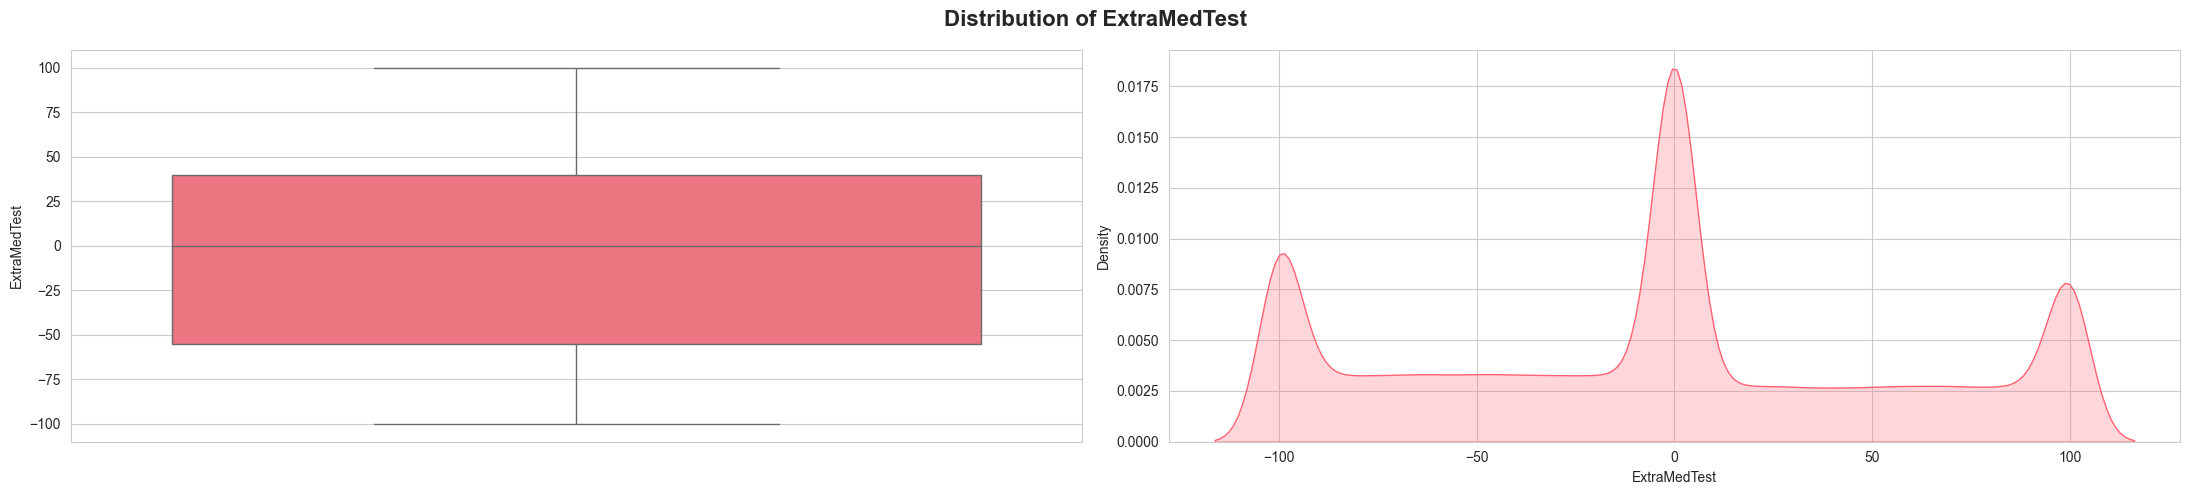

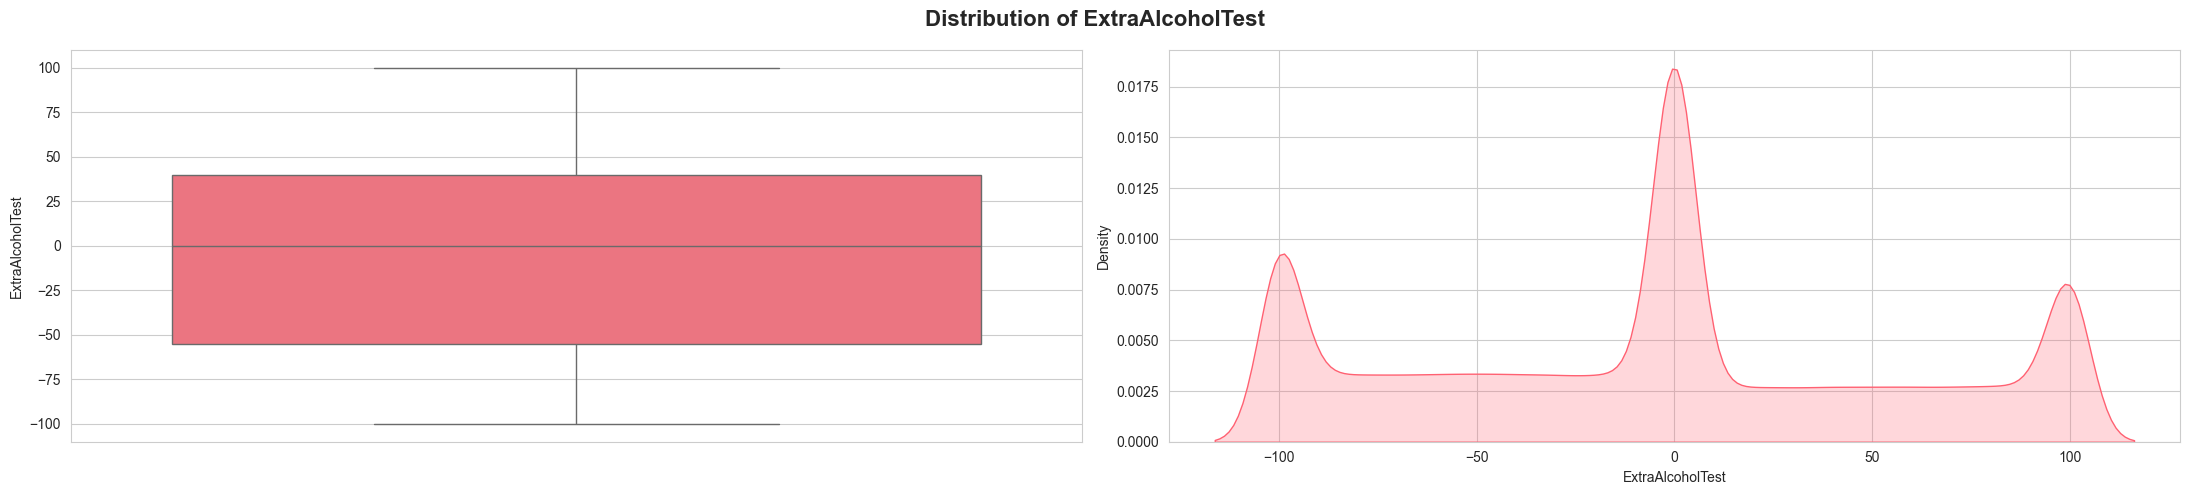

In [227]:
data_frequency(["ExtraMedTest", "ExtraAlcoholTest"], is_violin_plot=False, is_pie_chart=False, is_box_plot=True, is_kde=True)

### 9.3. Outliers Detection

In [228]:
styler.draw_box("Outlier Detection (IQR): ExtraMedTest")
print(outlier_detector.find_outliers_iqr(df_train_cleaned["ExtraMedTest"]))

print()

styler.draw_box("Outlier Detection (IQR): ExtraAlcoholTest")
print(outlier_detector.find_outliers_iqr(df_train_cleaned["ExtraAlcoholTest"]))

┌─────────────────────────────────────────┐
│  Outlier Detection (IQR): ExtraMedTest  │
└─────────────────────────────────────────┘
╭─────────────────┬─────────╮
│ Key             │ Value   │
├─────────────────┼─────────┤
│ Unique Outliers │ None    │
├─────────────────┼─────────┤
│ Lower Bound     │ -197.5  │
├─────────────────┼─────────┤
│ Upper Bound     │ 182.5   │
├─────────────────┼─────────┤
│ Threshold       │ 1.5     │
├─────────────────┼─────────┤
│ Total Outliers  │ 0       │
╰─────────────────┴─────────╯

┌─────────────────────────────────────────────┐
│  Outlier Detection (IQR): ExtraAlcoholTest  │
└─────────────────────────────────────────────┘
╭─────────────────┬─────────╮
│ Key             │ Value   │
├─────────────────┼─────────┤
│ Unique Outliers │ None    │
├─────────────────┼─────────┤
│ Lower Bound     │ -197.5  │
├─────────────────┼─────────┤
│ Upper Bound     │ 182.5   │
├─────────────────┼─────────┤
│ Threshold       │ 1.5     │
├─────────────────┼─────────┤
│ T

### **Conclusion**

The inclusion of these features, denoted as **ExtraMedTest** and **ExtraAlcoholTest**, offers a more comprehensive understanding of patients' health beyond the initial focus on primary health conditions and lifestyle factors. These features are continuous in nature, potentially supporting in the identification of risk factors or underlying health concerns that may influence a patient's diabetic status.

The frequency distribution of these features reveals the following patterns:

- **ExtraMedTest:** The distribution of results from the additional medical test exhibits relative balance, with a range spanning from `-100` to `100`.
- **ExtraAlcoholTest:** Similar to the **ExtraMedTest**, the distribution of results from the additional alcohol test also demonstrates balance.

**Outliers**

No outliers were identified within either feature set. To ensure data integrity, further analysis of these features will be conducted during the data preprocessing stage to address any potential issues and enhance the reliability of subsequent analyses.


# IV. Multivariate Analysis

## 1 Configuration

In [181]:
# Save the cleaned dataset
df_train_cleaned = df_train.copy()  # Create a copy of the original dataset
colors = ["#ff2c43", "#44c5ff", "#ffc02c", "#44ff9f", "#9f44ff"]  # Plot colors


def multi_kde_plot(data, columns):
    """
    Plot kernel density estimation (KDE) for multiple columns on the same plot.

    Parameters:
        data (DataFrame): The dataset containing the columns to plot.
        columns (list): List of column names to plot KDE for.

    Returns:
        None (displays the plot)
    """
    # Set the style of the plot
    sns.set_style("whitegrid")

    plt.figure(figsize=(20, 8))

    # Plot KDE for each column with different colors
    for i, col in enumerate(columns):
        sns.kdeplot(data[col], label=col, fill=True, color=colors[i % len(colors)])

    # Add legend
    plt.legend()

    # Set plot title
    plt.title("Kernel Density Estimation (KDE) Plot")

    # Set plot labels
    plt.xlabel("Value")
    plt.ylabel("Density")

    # Show the plot
    plt.show()


def data_dependancy(data, columns, hue=None):
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Change to 1 row, 2 columns
    num_cols = len(columns)
    palette = sns.color_palette("husl", num_cols)

    # Plot Violin plot for the first diagram (axes[0])
    df = pd.DataFrame(data, columns=columns)
    sns.violinplot(data=df, inner="quartile", ax=axes[0], hue=hue, palette=palette)
    axes[0].set_title("Violin Plot")

    # Plot Correlation for the second diagram (axes[1])
    sns.heatmap(
        df.corr(),
        annot=True,
        cmap="Reds",
        ax=axes[1],
        center=True,
        annot_kws={"size": 16},
    )
    axes[1].set_title("Correlation")

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

def bivariate_analysis(data, columns):
    # multi_kde_plot(data, columns=columns)
    # data_dependancy(data, columns=columns)

    styler.draw_box("Logistic Regression Analysis")
    neko.logistic_regression_analysis(data, columns=columns)

## 2. Bivariate Analysis

### 2.1 High Blood Pressure vs. Status

In [310]:
bivariate_analysis(data=df_train, columns=df_train.columns)

┌────────────────────────────────┐
│  Logistic Regression Analysis  │
└────────────────────────────────┘



Confusion Matrix:
╭─────────────────┬──────────────────────┬──────────────────────╮
│                 │   Predicted Negative │   Predicted Positive │
├─────────────────┼──────────────────────┼──────────────────────┤
│ Actual Negative │                29456 │                 3929 │
├─────────────────┼──────────────────────┼──────────────────────┤
│ Actual Positive │                 1395 │                 5768 │
╰─────────────────┴──────────────────────┴──────────────────────╯

                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:               267440
Model:                          Logit   Df Residuals:                   267416
Method:                           MLE   Df Model:                           23
Date:                Tue, 02 Apr 2024   Pseudo R-squ.:                  0.5823
Time:                        17:22:00   Log-Likelihood:                -77430.
converged:                       True   LL-N

#### **Conclusion**

- Based on the logistic regression analysis, the p-value for the association between **High Blood Pressure** and **Status** is **0.6624**, which is greater than the commonly used significance level of **0.05**. This suggests that we fail to reject the null hypothesis. 

- In other words, the data does not provide statistically significant evidence to conclude that there's a relationship between **High Blood Pressure** and **Status**.